# MIE1624 Assignment 1

## Import relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import metrics

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [2]:
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)
pd.set_option('display.width', 1000)

## Import data into a dataframe

In [3]:
dfc = pd.read_csv('Kaggle_Salary_clean.csv', encoding = "ISO-8859-1")
dfc.shape

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (1,3,9,11,22,24,25,26,27,28,29,45,57,65,84,86,88,108,110,124,126,151,195,209,224,250,263,265,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,305,307,323,326,327,330,342,372,385,386,394,395) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(15430, 397)

In [4]:
dfc.head()
f

,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,Q7_OTHER_TEXT,Q8,Q9,Q10,Q11_Part_1,Q11_Part_2,Q11_Part_3,Q11_Part_4,Q11_Part_5,Q11_Part_6,Q11_Part_7,Q11_OTHER_TEXT,Q12_MULTIPLE_CHOICE,Q12_Part_1_TEXT,Q12_Part_2_TEXT,Q12_Part_3_TEXT,Q12_Part_4_TEXT,Q12_Part_5_TEXT,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q13_Part_13,Q13_Part_14,Q13_Part_15,Q13_OTHER_TEXT,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER_TEXT,Q15_Part_1,Q15_Part_2,Q15_Part_3,Q15_Part_4,Q15_Part_5,Q15_Part_6,Q15_Part_7,Q15_OTHER_TEXT,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_Part_16,Q16_Part_17,Q16_Part_18,Q16_OTHER_TEXT,Q17,Q17_OTHER_TEXT,Q18,Q18_OTHER_TEXT,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_Part_6,Q19_Part_7,Q19_Part_8,Q19_Part_9,Q19_Part_10,Q19_Part_11,Q19_Part_12,Q19_Part_13,Q19_Part_14,Q19_Part_15,Q19_Part_16,Q19_Part_17,Q19_Part_18,Q19_Part_19,Q19_OTHER_TEXT,Q20,Q20_OTHER_TEXT,Q21_Part_1,Q21_Part_2,Q21_Part_3,Q21_Part_4,Q21_Part_5,Q21_Part_6,Q21_Part_7,Q21_Part_8,Q21_Part_9,Q21_Part_10,Q21_Part_11,Q21_Part_12,Q21_Part_13,Q21_OTHER_TEXT,Q22,Q22_OTHER_TEXT,Q23,Q24,Q25,Q26,Q27_Part_1,Q27_Part_2,Q27_Part_3,Q27_Part_4,Q27_Part_5,Q27_Part_6,Q27_Part_7,Q27_Part_8,Q27_Part_9,Q27_Part_10,Q27_Part_11,Q27_Part_12,Q27_Part_13,Q27_Part_14,Q27_Part_15,Q27_Part_16,Q27_Part_17,Q27_Part_18,Q27_Part_19,Q27_Part_20,Q27_OTHER_TEXT,Q28_Part_1,Q28_Part_2,Q28_Part_3,Q28_Part_4,Q28_Part_5,Q28_Part_6,Q28_Part_7,Q28_Part_8,Q28_Part_9,Q28_Part_10,Q28_Part_11,Q28_Part_12,Q28_Part_13,Q28_Part_14,Q28_Part_15,Q28_Part_16,Q28_Part_17,Q28_Part_18,Q28_Part_19,Q28_Part_20,Q28_Part_21,Q28_Part_22,Q28_Part_23,Q28_Part_24,Q28_Part_25,Q28_Part_26,Q28_Part_27,Q28_Part_28,Q28_Part_29,Q28_Part_30,Q28_Part_31,Q28_Part_32,Q28_Part_33,Q28_Part_34,Q28_Part_35,Q28_Part_36,Q28_Part_37,Q28_Part_38,Q28_Part_39,Q28_Part_40,Q28_Part_41,Q28_Part_42,Q28_Part_43,Q28_OTHER_TEXT,Q29_Part_1,Q29_Part_2,Q29_Part_3,Q29_Part_4,Q29_Part_5,Q29_Part_6,Q29_Part_7,Q29_Part_8,Q29_Part_9,Q29_Part_10,Q29_Part_11,Q29_Part_12,Q29_Part_13,Q29_Part_14,Q29_Part_15,Q29_Part_16,Q29_Part_17,Q29_Part_18,Q29_Part_19,Q29_Part_20,Q29_Part_21,Q29_Part_22,Q29_Part_23,Q29_Part_24,Q29_Part_25,Q29_Part_26,Q29_Part_27,Q29_Part_28,Q29_OTHER_TEXT,Q30_Part_1,Q30_Part_2,Q30_Part_3,Q30_Part_4,Q30_Part_5,Q30_Part_6,Q30_Part_7,Q30_Part_8,Q30_Part_9,Q30_Part_10,Q30_Part_11,Q30_Part_12,Q30_Part_13,Q30_Part_14,Q30_Part_15,Q30_Part_16,Q30_Part_17,Q30_Part_18,Q30_Part_19,Q30_Part_20,Q30_Part_21,Q30_Part_22,Q30_Part_23,Q30_Part_24,Q30_Part_25,Q30_OTHER_TEXT,Q31_Part_1,Q31_Part_2,Q31_Part_3,Q31_Part_4,Q31_Part_5,Q31_Part_6,Q31_Part_7,Q31_Part_8,Q31_Part_9,Q31_Part_10,Q31_Part_11,Q31_Part_12,Q31_OTHER_TEXT,Q32,Q32_OTHER,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_OTHER_TEXT,Q35_Part_1,Q35_Part_2,Q35_Part_3,Q35_Part_4,Q35_Part_5,Q35_Part_6,Q35_OTHER_TEXT,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_Part_10,Q36_Part_11,Q36_Part_12,Q36_Part_13,Q36_OTHER_TEXT,Q37,Q37_OTHER_TEXT,Q38_Part_1,Q38_Part_2,Q38_Part_3,Q38_Part_4,Q38_Part_5,Q38_Part_6,Q38_Part_7,Q38_Part_8,Q38_Part_9,Q38_Part_10,Q38_Part_11,Q38_Part_12,Q38_Part_13,Q38_Part_14,Q38_Part_15,Q38_Part_16,Q38_Part_17,Q38_Part_18,Q38_Part_19,Q38_Part_20,Q38_Part_21,Q38_Part_22,Q38_OTHER_TEXT,Q39_Part_1,Q39_Part_2,Q40,Q41_Part_1,Q41_Part_2,Q41_Part_3,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q42_OTHER_TEXT,Q43,Q44_Part_1,Q44_Part_2,Q44_Part_3,Q44_Part_4,Q44_Part_5,Q44_Part_6,Q45_Part_1,Q45_P

## Check for missing data

In [5]:
dfc.isnull().sum()

Unnamed: 0                                 0
Time from Start to Finish (seconds)        0
Q1                                         0
Q1_OTHER_TEXT                              0
Q2                                         0
Q3                                         0
Q4                                         0
Q5                                       135
Q6                                         0
Q6_OTHER_TEXT                              0
Q7                                         0
Q7_OTHER_TEXT                              0
Q8                                        76
Q9                                         0
Q10                                      292
Q11_Part_1                              7966
Q11_Part_2                             11186
Q11_Part_3                             11278
Q11_Part_4                              9705
Q11_Part_5                             11845
Q11_Part_6                             12914
Q11_Part_7                             14758
Q11_OTHER_

#### We notice that some questions in the dataset have multiple parts, each with a differing answer. We can try to combine the dataset for each question to get rid of null answers

In [6]:
dfc.drop(0, inplace=True)

In [7]:
dfc['Q11'] = dfc[['Q11_Part_1','Q11_Part_2','Q11_Part_3','Q11_Part_4','Q11_Part_5','Q11_Part_6','Q11_Part_7']].apply(lambda x: ' - '.join(x[x.notnull()]), axis=1)
dfc.drop(['Q1_OTHER_TEXT'], axis=1, inplace=True)
dfc.drop(['Q6_OTHER_TEXT'], axis=1, inplace=True)
dfc.drop(['Q7_OTHER_TEXT'], axis=1, inplace=True)
dfc.drop(['Q12_Part_1_TEXT'], axis=1, inplace=True)
dfc.drop(['Q12_Part_2_TEXT'], axis=1, inplace=True)
dfc.drop(['Q12_Part_3_TEXT'], axis=1, inplace=True)
dfc.drop(['Q12_Part_4_TEXT'], axis=1, inplace=True)
dfc.drop(['Q12_Part_5_TEXT'], axis=1, inplace=True)
dfc.drop(['Q12_OTHER_TEXT'], axis=1, inplace=True)
dfc['Q13'] = dfc[['Q13_Part_1','Q13_Part_2','Q13_Part_3','Q13_Part_4','Q13_Part_5','Q13_Part_6','Q13_Part_7', 'Q13_Part_8','Q13_Part_9','Q13_Part_10','Q13_Part_11','Q13_Part_12','Q13_Part_13','Q13_Part_14','Q13_Part_15']].apply(lambda x: ' - '.join(x[x.notnull()]), axis=1)
dfc['Q14'] = dfc[['Q14_Part_1','Q14_Part_2','Q14_Part_3','Q14_Part_4','Q14_Part_5','Q14_Part_6','Q14_Part_7', 'Q14_Part_8','Q14_Part_9','Q14_Part_10','Q14_Part_11']].apply(lambda x: ' - '.join(x[x.notnull()]), axis=1)
dfc['Q15'] = dfc[['Q15_Part_1','Q15_Part_2','Q15_Part_3','Q15_Part_4','Q15_Part_5','Q15_Part_6','Q15_Part_7']].apply(lambda x: ' - '.join(x[x.notnull()]), axis=1)
dfc['Q16'] = dfc[['Q16_Part_1','Q16_Part_2','Q16_Part_3','Q16_Part_4','Q16_Part_5','Q16_Part_6','Q16_Part_7', 'Q16_Part_8','Q16_Part_9','Q16_Part_10','Q16_Part_11','Q16_Part_12','Q16_Part_13','Q16_Part_14','Q16_Part_15','Q16_Part_16','Q16_Part_17','Q16_Part_18']].apply(lambda x: ' - '.join(x[x.notnull()]), axis=1)
dfc.drop(['Q11_OTHER_TEXT'], axis=1, inplace=True)
dfc.drop(['Q17_OTHER_TEXT'], axis=1, inplace=True)
dfc.drop(['Q18_OTHER_TEXT'], axis=1, inplace=True)
dfc['Q19'] = dfc[['Q19_Part_1','Q19_Part_2','Q19_Part_3','Q19_Part_4','Q19_Part_5','Q19_Part_6','Q19_Part_7', 'Q19_Part_8','Q19_Part_9','Q19_Part_10','Q19_Part_11','Q19_Part_12','Q19_Part_13','Q19_Part_14','Q19_Part_15','Q19_Part_16','Q19_Part_17','Q19_Part_18','Q19_Part_19']].apply(lambda x: ' - '.join(x[x.notnull()]), axis=1)
dfc['Q21'] = dfc[['Q21_Part_1','Q21_Part_2','Q21_Part_3','Q21_Part_4','Q21_Part_5','Q21_Part_6','Q21_Part_7', 'Q21_Part_8','Q21_Part_9','Q21_Part_10','Q21_Part_11','Q21_Part_12','Q21_Part_13']].apply(lambda x: ' - '.join(x[x.notnull()]), axis=1)
dfc['Q27'] = dfc[['Q27_Part_1','Q27_Part_2','Q27_Part_3','Q27_Part_4','Q27_Part_5','Q27_Part_6','Q27_Part_7', 'Q27_Part_8','Q27_Part_9','Q27_Part_10','Q27_Part_11','Q27_Part_12','Q27_Part_13','Q27_Part_14','Q27_Part_15','Q27_Part_16','Q27_Part_17','Q27_Part_18','Q27_Part_19','Q27_Part_20']].apply(lambda x: ' - '.join(x[x.notnull()]), axis=1)
dfc['Q28'] = dfc[['Q28_Part_1','Q28_Part_2','Q28_Part_3','Q28_Part_4','Q28_Part_5','Q28_Part_6','Q28_Part_7', 'Q28_Part_8','Q28_Part_9','Q28_Part_10','Q28_Part_11','Q28_Part_12','Q28_Part_13','Q28_Part_14','Q28_Part_15','Q28_Part_16','Q28_Part_17','Q28_Part_18','Q28_Part_19','Q28_Part_20','Q28_Part_21','Q28_Part_22','Q28_Part_23','Q28_Part_24','Q28_Part_25','Q28_Part_26','Q28_Part_27', 'Q28_Part_28','Q28_Part_29','Q28_Part_30','Q28_Part_31','Q28_Part_32','Q28_Part_33','Q28_Part_34','Q28_Part_35','Q28_Part_36','Q28_Part_37','Q28_Part_38','Q28_Part_39','Q28_Part_40','Q28_Part_41','Q28_Part_42','Q28_Part_43']].apply(lambda x: ' - '.join(x[x.notnull()]), axis=1)
dfc['Q29'] = dfc[['Q29_Part_1','Q29_Part_2','Q29_Part_3','Q29_Part_4','Q29_Part_5','Q29_Part_6','Q29_Part_7', 'Q29_Part_8','Q29_Part_9','Q29_Part_10','Q29_Part_11','Q29_Part_12','Q29_Part_13','Q29_Part_14','Q29_Part_15','Q29_Part_16','Q29_Part_17','Q29_Part_18','Q29_Part_19','Q29_Part_20','Q29_Part_21','Q29_Part_22','Q29_Part_23','Q29_Part_24','Q29_Part_25','Q29_Part_26','Q29_Part_27', 'Q29_Part_28']].apply(lambda x: ' - '.join(x[x.notnull()]), axis=1)
dfc['Q30'] = dfc[['Q30_Part_1','Q30_Part_2','Q30_Part_3','Q30_Part_4','Q30_Part_5','Q30_Part_6','Q30_Part_7', 'Q30_Part_8','Q30_Part_9','Q30_Part_10','Q30_Part_11','Q30_Part_12','Q30_Part_13','Q30_Part_14','Q30_Part_15','Q30_Part_16','Q30_Part_17','Q30_Part_18','Q30_Part_19','Q30_Part_20','Q30_Part_21','Q30_Part_22','Q30_Part_23','Q30_Part_24','Q30_Part_25']].apply(lambda x: ' - '.join(x[x.notnull()]), axis=1)
dfc['Q31'] = dfc[['Q31_Part_1','Q31_Part_2','Q31_Part_3','Q31_Part_4','Q31_Part_5','Q31_Part_6','Q31_Part_7', 'Q31_Part_8','Q31_Part_9','Q31_Part_10','Q31_Part_11','Q31_Part_12']].apply(lambda x: ' - '.join(x[x.notnull()]), axis=1)
dfc['Q33'] = dfc[['Q33_Part_1','Q33_Part_2','Q33_Part_3','Q33_Part_4','Q33_Part_5','Q33_Part_6','Q33_Part_7', 'Q33_Part_8','Q33_Part_9','Q33_Part_10','Q33_Part_11']].apply(lambda x: ' - '.join(x[x.notnull()]), axis=1)
dfc['Q36'] = dfc[['Q36_Part_1','Q36_Part_2','Q36_Part_3','Q36_Part_4','Q36_Part_5','Q36_Part_6','Q36_Part_7', 'Q36_Part_8','Q36_Part_9','Q36_Part_10','Q36_Part_11','Q36_Part_12','Q36_Part_13']].apply(lambda x: ' - '.join(x[x.notnull()]), axis=1)
dfc['Q38'] = dfc[['Q38_Part_1','Q38_Part_2','Q38_Part_3','Q38_Part_4','Q38_Part_5','Q38_Part_6','Q38_Part_7', 'Q38_Part_8','Q38_Part_9','Q38_Part_10','Q38_Part_11','Q38_Part_12','Q38_Part_13','Q38_Part_14','Q38_Part_15','Q38_Part_16','Q38_Part_17','Q38_Part_18','Q38_Part_19','Q38_Part_20','Q38_Part_21','Q38_Part_22']].apply(lambda x: ' - '.join(x[x.notnull()]), axis=1)
dfc['Q42'] = dfc[['Q42_Part_1','Q42_Part_2','Q42_Part_3','Q42_Part_4','Q42_Part_5']].apply(lambda x: ' - '.join(x[x.notnull()]), axis=1)
dfc['Q44'] = dfc[['Q44_Part_1','Q44_Part_2','Q44_Part_3','Q44_Part_4','Q44_Part_5','Q44_Part_6']].apply(lambda x: ' - '.join(x[x.notnull()]), axis=1)
dfc['Q45'] = dfc[['Q45_Part_1','Q45_Part_2','Q45_Part_3','Q45_Part_4','Q45_Part_5','Q45_Part_6']].apply(lambda x: ' - '.join(x[x.notnull()]), axis=1)
dfc['Q47'] = dfc[['Q47_Part_1','Q47_Part_2','Q47_Part_3','Q47_Part_4','Q47_Part_5','Q47_Part_6','Q47_Part_7', 'Q47_Part_8','Q47_Part_9','Q47_Part_10','Q47_Part_11','Q47_Part_12','Q47_Part_13','Q47_Part_14','Q47_Part_15','Q47_Part_16']].apply(lambda x: ' - '.join(x[x.notnull()]), axis=1)
dfc['Q49'] = dfc[['Q49_Part_1','Q49_Part_2','Q49_Part_3','Q49_Part_4','Q49_Part_5','Q49_Part_6','Q49_Part_7', 'Q49_Part_8','Q49_Part_9','Q49_Part_10','Q49_Part_11','Q49_Part_12']].apply(lambda x: ' - '.join(x[x.notnull()]), axis=1)
dfc['Q50'] = dfc[['Q50_Part_1','Q50_Part_2','Q50_Part_3','Q50_Part_4','Q50_Part_5','Q50_Part_6','Q50_Part_7', 'Q50_Part_8']].apply(lambda x: ' - '.join(x[x.notnull()]), axis=1)
dfc.drop(['Q22_OTHER_TEXT'], axis=1, inplace=True)
dfc.drop(['Unnamed: 0'],axis=1,inplace=True)
dfc.drop(['Time from Start to Finish (seconds)'],axis=1,inplace=True)
dfc.replace(r'^\s*$', np.nan, regex=True, inplace=True)
dfc.isnull().sum()

Q1                         0
Q2                         0
Q3                         0
Q4                         0
Q5                       135
Q6                         0
Q7                         0
Q8                        76
Q9                         0
Q10                      292
Q11_Part_1              7966
Q11_Part_2             11186
Q11_Part_3             11278
Q11_Part_4              9705
Q11_Part_5             11845
Q11_Part_6             12914
Q11_Part_7             14758
Q12_MULTIPLE_CHOICE     1572
Q13_Part_1              5177
Q13_Part_2              9066
Q13_Part_3             10238
Q13_Part_4             11755
Q13_Part_5             15325
Q13_Part_6             12525
Q13_Part_7             11535
Q13_Part_8             11839
Q13_Part_9              9747
Q13_Part_10            11002
Q13_Part_11            12199
Q13_Part_12            12908
Q13_Part_13            11580
Q13_Part_14            15100
Q13_Part_15            14487
Q13_OTHER_TEXT             0
Q14_Part_1    

In [8]:
# list1 = list(range(15,22))
# dfc.drop(dfc.columns[list1], axis=1, inplace=True)
# list1 = list(range(14,30))
# dfc.drop(dfc.columns[list1], axis=1, inplace=True)
# list1 = list(range(14,26))
# dfc.drop(dfc.columns[list1], axis=1, inplace=True)
# list1 = list(range(14,22))
# dfc.drop(dfc.columns[list1], axis=1, inplace=True)
# list1 = list(range(14,33))
# dfc.drop(dfc.columns[list1], axis=1, inplace=True)
# list1 = list(range(15,35))
# dfc.drop(dfc.columns[list1], axis=1, inplace=True)
# list1 = list(range(15,30))
# dfc.drop(dfc.columns[list1], axis=1, inplace=True)
# list1 = list(range(21,42))
# dfc.drop(dfc.columns[list1], axis=1, inplace=True)
# list1 = list(range(21,65))
# dfc.drop(dfc.columns[list1], axis=1, inplace=True)
# list1 = list(range(21,50))
# dfc.drop(dfc.columns[list1], axis=1, inplace=True)
# list1 = list(range(21,47))
# dfc.drop(dfc.columns[list1], axis=1, inplace=True)
# list1 = list(range(21,34))
# dfc.drop(dfc.columns[list1], axis=1, inplace=True)
# list1 = list(range(22,35))
# dfc.drop(dfc.columns[list1], axis=1, inplace=True)
# list1 = list(range(36,50))
# dfc.drop(dfc.columns[list1], axis=1, inplace=True)
# list1 = list(range(37,61))
# dfc.drop(dfc.columns[list1], axis=1, inplace=True)
# list1 = list(range(43,49))
# dfc.drop(dfc.columns[list1], axis=1, inplace=True)
# list1 = list(range(44,50))
# dfc.drop(dfc.columns[list1], axis=1, inplace=True)
# list1 = list(range(44,50))
# dfc.drop(dfc.columns[list1], axis=1, inplace=True)
# list1 = list(range(45,61))
# dfc.drop(dfc.columns[list1], axis=1, inplace=True)
# list1 = list(range(46,59))
# dfc.drop(dfc.columns[list1], axis=1, inplace=True)
# list1 = list(range(46,56))
# dfc.drop(dfc.columns[list1], axis=1, inplace=True)

#### There is a lot of missing data here however after many iterations if we remove the missing data rows from these 3 questions our problem gets simplified.

In [9]:
dfc.dropna(subset=['Q43'],inplace=True) 
dfc.dropna(subset=['Q45'],inplace=True) 
dfc.dropna(subset=['Q50'],inplace=True)

In [10]:
dfc.isnull().sum()

Q1                        0
Q2                        0
Q3                        0
Q4                        0
Q5                       36
Q6                        0
Q7                        0
Q8                       36
Q9                        0
Q10                       0
Q11_Part_1             3924
Q11_Part_2             6033
Q11_Part_3             6200
Q11_Part_4             4854
Q11_Part_5             6588
Q11_Part_6             7794
Q11_Part_7             8640
Q12_MULTIPLE_CHOICE       0
Q13_Part_1             1841
Q13_Part_2             4435
Q13_Part_3             5448
Q13_Part_4             6547
Q13_Part_5             8912
Q13_Part_6             6911
Q13_Part_7             6359
Q13_Part_8             6729
Q13_Part_9             5241
Q13_Part_10            5954
Q13_Part_11            6705
Q13_Part_12            7334
Q13_Part_13            6259
Q13_Part_14            8881
Q13_Part_15            8385
Q13_OTHER_TEXT            0
Q14_Part_1             5856
Q14_Part_2          

#### Now we see the actual missing values, Let us try to fill in the missing values

In [11]:
dfc['Q5'].unique()

array(['Computer science (software engineering, etc.)',
       'Mathematics or statistics',
       'Information technology, networking, or system administration',
       'Engineering (non-computer focused)',
       'A business discipline (accounting, economics, finance, etc.)',
       'Environmental science or geology',
       'Medical or life sciences (biology, chemistry, medicine, etc.)',
       'I never declared a major', 'Other', 'Physics or astronomy',
       'Social sciences (anthropology, psychology, sociology, etc.)',
       'Humanities (history, literature, philosophy, etc.)', nan,
       'Fine arts or performing arts'], dtype=object)

In [12]:
a = dfc['Q4'].value_counts(normalize=True)
b = dfc[dfc['Q5'].isnull()]['Q4'].value_counts(normalize=True)
print(pd.DataFrame({'Alldata':a, 'NaN datatype':b}))

                                                     Alldata  NaN datatype
Bachelorâs degree                                 0.260449           NaN
Doctoral degree                                     0.189862           NaN
I prefer not to answer                              0.005892           NaN
Masterâs degree                                   0.484771           NaN
No formal education past high school                0.004002           1.0
Professional degree                                 0.024233           NaN
Some college/university study without earning a...  0.030791           NaN


#### Comparing educational background with study major we find that all NaN values are for those people who have no formal education past high school. So replace them with a new variable "Invalid"

In [13]:
dfc['Q5'].fillna('Invalid', inplace=True)

In [14]:
dfc['Q8'].unique()

array(['0-1', '10-15', '3-4', '5-10', nan, '1-2', '2-3', '15-20', '4-5',
       '25-30', '20-25', '30 +'], dtype=object)

In [15]:
a = dfc['Q7'].value_counts(normalize=True)
b = dfc[dfc['Q8'].isnull()]['Q7'].value_counts(normalize=True)
print(pd.DataFrame({'Alldata':a, 'NaN datatype':b}))

                                         Alldata  NaN datatype
Academics/Education                     0.127279      0.083333
Accounting/Finance                      0.081369      0.083333
Broadcasting/Communications             0.022677           NaN
Computers/Technology                    0.268564           NaN
Energy/Mining                           0.023566           NaN
Government/Public Service               0.037572           NaN
Hospitality/Entertainment/Sports        0.009449           NaN
I am a student                          0.120943      0.777778
Insurance/Risk Assessment               0.033570           NaN
Manufacturing/Fabrication               0.027568           NaN
Marketing/CRM                           0.024900           NaN
Medical/Pharmaceutical                  0.043686      0.027778
Military/Security/Defense               0.010894           NaN
Non-profit/Service                      0.009560           NaN
Online Business/Internet-based Sales    0.016785       

#### Around 76% of our missing data is comparable to the current industry the user works at, i.e I am a student. So we can replace the NaN values with mode value which is 0-1

In [16]:
dfc['Q8'].fillna(dfc['Q8'].mode()[0],inplace=True)

In [17]:
dfc['Q17'].unique()

array(['Java', 'SQL', nan, 'C#/.NET', 'Python', 'R', 'MATLAB',
       'Visual Basic/VBA', 'Javascript/Typescript', 'C/C++', 'Scala',
       'SAS/STATA', 'Other', 'PHP', 'Bash', 'Go', 'Julia', 'Ruby'],
      dtype=object)

In [18]:
a = dfc['Q16'].value_counts(normalize=True)
b = dfc[dfc['Q17'].isnull()]['Q16'].value_counts(normalize=True)
print(pd.DataFrame({'Alldata':a, 'NaN datatype':b}))

                                                     Alldata  NaN datatype
Bash                                                0.000333      0.002049
Bash - C/C++                                        0.000111           NaN
Bash - C/C++ - MATLAB - C#/.NET                     0.000111           NaN
Bash - Java - Go - PHP                              0.000111           NaN
Bash - Java - Javascript/Typescript                 0.000111           NaN
Bash - Java - PHP                                   0.000111           NaN
Bash - Javascript/Typescript - C#/.NET              0.000111           NaN
Bash - Javascript/Typescript - C/C++ - C#/.NET      0.000111           NaN
Bash - Javascript/Typescript - C/C++ - PHP - Other  0.000111           NaN
Bash - Javascript/Typescript - MATLAB - Other       0.000111           NaN
Bash - Visual Basic/VBA - SAS/STATA                 0.000111           NaN
C#/.NET                                             0.001112      0.006831
C#/.NET - Other          

###### 67% of the values fall in the range of Python for programs used on a regular basis compared to most used program. Replace values with mode which is python

In [19]:
dfc['Q17'].fillna(dfc['Q17'].mode()[0],inplace=True)

In [20]:
dfc['Q20'].unique()

array([nan, 'Keras', 'Scikit-Learn', 'TensorFlow', 'Caret', 'Spark MLlib',
       'Caffe', 'mlr', 'PyTorch', 'randomForest', 'H20', 'Xgboost',
       'lightgbm', 'Fastai', 'Other', 'catboost', 'Prophet', 'CNTK',
       'Mxnet'], dtype=object)

In [21]:
a = dfc['Q19'].value_counts(normalize=True)
b = dfc[dfc['Q20'].isnull()]['Q19'].value_counts(normalize=True)
print(pd.DataFrame({'Alldata':a, 'NaN datatype':b}))

                                                     Alldata  NaN datatype
CNTK                                                0.000333      0.001520
CNTK - Other                                        0.000111           NaN
Caffe                                               0.000667      0.003040
Caret                                               0.005780      0.026342
Caret - Other                                       0.000222           NaN
Caret - Prophet - randomForest                      0.000445           NaN
Caret - Xgboost                                     0.000667           NaN
Caret - Xgboost - Prophet - randomForest - catb...  0.000111           NaN
Caret - Xgboost - Prophet - randomForest - ligh...  0.000111           NaN
Caret - Xgboost - mlr - randomForest                0.000333           NaN
Caret - Xgboost - mlr - randomForest - lightgbm...  0.000111           NaN
Caret - Xgboost - randomForest                      0.004780           NaN
Caret - Xgboost - randomF

#### Comparing with past libraries used by users, we can see the majority of the missing values lie between Scikit-Learn (27%) and None (44%). So we assign a new variable none to Q20 and replace all missing values with it

In [22]:
dfc['Q20'].fillna('None', inplace=True)

In [23]:
dfc['Q22'].unique()

array(['ggplot2', nan, 'Matplotlib', 'D3', 'Seaborn', 'Plotly', 'Shiny',
       'Other', 'Geoplotlib', 'Bokeh', 'Leaflet', 'Lattice', 'Altair'],
      dtype=object)

In [24]:
a = dfc['Q21'].value_counts(normalize=True)
b = dfc[dfc['Q22'].isnull()]['Q21'].value_counts(normalize=True)
print(pd.DataFrame({'Alldata':a, 'NaN datatype':b}))

                                                     Alldata  NaN datatype
Altair                                              0.000222      0.000881
Altair - Bokeh                                      0.000111           NaN
Altair - Bokeh - Seaborn                            0.000111           NaN
Altair - Lattice                                    0.000111           NaN
Altair - Other                                      0.000111           NaN
Altair - Seaborn - Lattice                          0.000111           NaN
Bokeh                                               0.000333      0.001321
Bokeh - Leaflet - Lattice                           0.000111           NaN
Bokeh - Other                                       0.000111           NaN
Bokeh - Seaborn                                     0.000333           NaN
Bokeh - Seaborn - Other                             0.000111           NaN
D3                                                  0.006336      0.025099
D3 - Bokeh               

#### Comparing with previous Q21 we find missing values for the most used visualization library lie where the user has only chosen 1 option in the previous question. So we directly substitue the value from Q21 directly into Q22

In [25]:
dfc.loc[(pd.isnull(dfc.Q22)), 'Q22'] = dfc.Q21

In [26]:
dfc['Q32'].unique()

array(['Time Series Data', nan, 'Numerical Data', 'Image Data',
       'Tabular Data', 'Sensor Data', 'Categorical Data', 'Text Data',
       'Geospatial Data', 'Audio Data', 'Video Data', 'Genetic Data',
       'Other Data'], dtype=object)

In [27]:
a = dfc['Q31'].value_counts(normalize=True)
b = dfc[dfc['Q32'].isnull()]['Q31'].value_counts(normalize=True)
print(pd.DataFrame({'Alldata':a, 'NaN datatype':b}))

                                                     Alldata  NaN datatype
Audio Data                                          0.000889      0.006309
Audio Data - Categorical Data                       0.000111           NaN
Audio Data - Categorical Data - Genetic Data - ...  0.000111           NaN
Audio Data - Categorical Data - Genetic Data - ...  0.001667           NaN
Audio Data - Categorical Data - Genetic Data - ...  0.000445           NaN
Audio Data - Categorical Data - Genetic Data - ...  0.000111           NaN
Audio Data - Categorical Data - Genetic Data - ...  0.000111           NaN
Audio Data - Categorical Data - Genetic Data - ...  0.000445           NaN
Audio Data - Categorical Data - Genetic Data - ...  0.000111           NaN
Audio Data - Categorical Data - Genetic Data - ...  0.000111           NaN
Audio Data - Categorical Data - Genetic Data - ...  0.000222           NaN
Audio Data - Categorical Data - Genetic Data - ...  0.000111           NaN
Audio Data - Categorical 

#### No likely trend found. So either discard missing values or replace with mode value. Here I have chosen to replace the missing data with mode values as furthering reducing our sample size does not seem optimal

In [28]:
dfc['Q32'].fillna(dfc['Q32'].mode()[0],inplace=True)

In [29]:
dfc['Q37'].unique()

array(['DataCamp', 'Coursera', nan, 'Udacity', 'Other', 'edX',
       'Kaggle Learn', 'Udemy', 'Online University Courses', 'DataQuest',
       'developers.google.com', 'Fast.AI', 'TheSchool.AI'], dtype=object)

In [30]:
a = dfc['Q36'].value_counts(normalize=True)
b = dfc[dfc['Q37'].isnull()]['Q36'].value_counts(normalize=True)
print(pd.DataFrame({'Alldata':a, 'NaN datatype':b}))

                                                     Alldata  NaN datatype
Coursera                                            0.102157      0.291653
Coursera - DataCamp                                 0.025456           NaN
Coursera - DataCamp - DataQuest                     0.001667           NaN
Coursera - DataCamp - DataQuest - Fast.AI           0.000333           NaN
Coursera - DataCamp - DataQuest - Fast.AI - Udemy   0.000222           NaN
Coursera - DataCamp - DataQuest - Fast.AI - dev...  0.000111           NaN
Coursera - DataCamp - DataQuest - Kaggle Learn      0.000889           NaN
Coursera - DataCamp - DataQuest - Kaggle Learn ...  0.000222           NaN
Coursera - DataCamp - DataQuest - Kaggle Learn ...  0.000111           NaN
Coursera - DataCamp - DataQuest - Kaggle Learn ...  0.000222           NaN
Coursera - DataCamp - DataQuest - Kaggle Learn ...  0.000111           NaN
Coursera - DataCamp - DataQuest - Kaggle Learn ...  0.000445           NaN
Coursera - DataCamp - Dat

#### Comparing online platforms used for the most amount of time with courses completed on online platforms no likely trends are found so either discard missing data or replace with mode value. 

In [31]:
dfc['Q37'].fillna(dfc['Q37'].mode()[0],inplace=True)

In [32]:
dfc['Q46'].unique()

array(['10-20', '20-30', '0', '50-60', '40-50', '90-100', '80-90', '0-10',
       '30-40', '70-80', nan, '60-70'], dtype=object)

In [33]:
a = dfc['Q45'].value_counts(normalize=True)
b = dfc[dfc['Q46'].isnull()]['Q45'].value_counts(normalize=True)
print(pd.DataFrame({'Alldata':a, 'NaN datatype':b}))

                                                     Alldata  NaN datatype
For all models right before putting the model i...  0.097599          0.10
For all models right before putting the model i...  0.021899          0.02
For all models right before putting the model i...  0.026345           NaN
For all models right before putting the model i...  0.033015          0.02
For all models right before putting the model i...  0.030791          0.02
For all models right before putting the model i...  0.054580          0.02
For all models right before putting the model i...  0.022454          0.02
For all models right before putting the model i...  0.029346          0.02
I do not explore and interpret model insights a...  0.095042          0.36
Only for very important models that are already...  0.043686          0.06
Only for very important models that are already...  0.008115          0.02
Only for very important models that are already...  0.001779           NaN
Only for very important m

#### Fill missing values for unknown as no trend is found between interrelated Q46 and Q45

In [34]:
dfc['Q46'].fillna('Unknown', inplace=True)

#### Q27-Q30 are all interrelated with a lot of missing values. Even after trimming the data it is not possible to find a trend among these so we will remove them from the dataset

In [35]:
dfc.drop(dfc.loc[:,'Q27_Part_1':'Q27_OTHER_TEXT'].head(0).columns, axis=1, inplace=True)
dfc.drop(dfc.loc[:,'Q28_Part_1':'Q28_OTHER_TEXT'].head(0).columns, axis=1, inplace=True)
dfc.drop(dfc.loc[:,'Q29_Part_1':'Q29_OTHER_TEXT'].head(0).columns, axis=1, inplace=True)
dfc.drop(dfc.loc[:,'Q30_Part_1':'Q30_OTHER_TEXT'].head(0).columns, axis=1, inplace=True)
dfc.drop(['Q27'], axis=1, inplace=True)
dfc.drop(['Q28'], axis=1, inplace=True)
dfc.drop(['Q29'], axis=1, inplace=True)
dfc.drop(['Q30'], axis=1, inplace=True)

In [36]:
dfc.isnull().sum()

Q1                        0
Q2                        0
Q3                        0
Q4                        0
Q5                        0
Q6                        0
Q7                        0
Q8                        0
Q9                        0
Q10                       0
Q11_Part_1             3924
Q11_Part_2             6033
Q11_Part_3             6200
Q11_Part_4             4854
Q11_Part_5             6588
Q11_Part_6             7794
Q11_Part_7             8640
Q12_MULTIPLE_CHOICE       0
Q13_Part_1             1841
Q13_Part_2             4435
Q13_Part_3             5448
Q13_Part_4             6547
Q13_Part_5             8912
Q13_Part_6             6911
Q13_Part_7             6359
Q13_Part_8             6729
Q13_Part_9             5241
Q13_Part_10            5954
Q13_Part_11            6705
Q13_Part_12            7334
Q13_Part_13            6259
Q13_Part_14            8881
Q13_Part_15            8385
Q13_OTHER_TEXT            0
Q14_Part_1             5856
Q14_Part_2          

In [37]:
dfc.shape

(8996, 279)

In [38]:
dfc.Q9.unique()

array(['0-10,000', '10-20,000', '20-30,000', '125-150,000', '30-40,000',
       '50-60,000', '100-125,000', '90-100,000', '70-80,000', '80-90,000',
       '60-70,000', '40-50,000', '150-200,000', '300-400,000',
       '200-250,000', '500,000+', '400-500,000', '250-300,000'],
      dtype=object)

In [39]:
labels1= ['0-10,000', '10-20,000', '20-30,000', '125-150,000', '30-40,000',
       '50-60,000', '100-125,000', '90-100,000', '70-80,000', '80-90,000',
       '60-70,000', '40-50,000', '150-200,000', '300-400,000',
       '200-250,000', '500,000+', '400-500,000', '250-300,000']
labels = [5000, 15000, 25000, 137500 , 35000, 
          55000, 112500 ,95000, 75000, 85000,
          65000, 45000, 175000, 350000,
         225000, 500000, 450000, 275000]
dfc['Q9'].replace(labels1, labels, inplace= True)
dfc.rename(columns= {'Q9':'Salary'}, inplace=True)
dfc.Salary.unique()

array([  5000,  15000,  25000, 137500,  35000,  55000, 112500,  95000,
        75000,  85000,  65000,  45000, 175000, 350000, 225000, 500000,
       450000, 275000], dtype=int64)

#### With this we have filled in the missing data and essentially are complete with Data Cleaning. Next we will look towards the visualization section

# Visualizing the data

#### Distribution of our target variable shows most data is between the 0-50,000 salary range with only a few values being seen after the 200,000 salary range

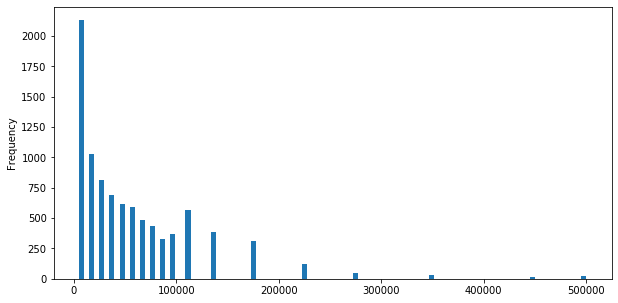

In [40]:
dfc['Salary'].plot.hist(bins=100, figsize = (10,5))

#### Lets see a comparison of years of experience(Q8) against annual salary

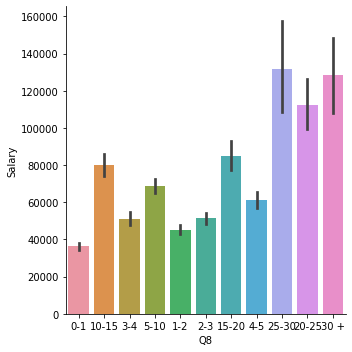

In [41]:
sns.catplot(x='Q8',y='Salary',data=dfc,kind='bar')

####  From the graph we see an increasing annual salary trend as years of experience increase, which is the case in most real life situations. This feature might be important to use for our model, however that selection will be left to our feature selection algorithm. However as years of experience increase so does the variance in the payscale

#### Lets also look at how gender plays a role in determining the salary range for data science

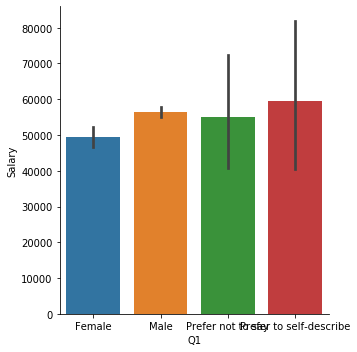

In [42]:
sns.catplot(x='Q1',y='Salary',data=dfc,kind='bar')

#### From the graph we can assume that between males and females, males have a much higher pay over females with much less variance in their pay than females. For the other 2 gender options there is not enough data on both of them to accurately make conclusions

# Encoding

#### I have mainly chosen to perform a one-hot encoding method on most of the categorical values, as the values in the dataset are split into multiple parts with each part being an answer to the whole question i.e part 1,2,3,4...etc respectively. One-hot encoding is easier to perform, althought it will make our feature size a lot bigger. However feature selection would be done after this step. 
#### For numerical values, means were taken to convert them into a single int or float value which will be readable by our logistic regression model. For Questions that were interrelated with each other, I have chosen to ignore them and not use them for our list of features

In [43]:
dfc.Q3.unique()

array(['United States of America', 'India', 'Chile', 'Hungary', 'France',
       'Argentina', 'Japan', 'Colombia', 'Nigeria', 'Spain', 'Other',
       'Iran, Islamic Republic of...',
       'United Kingdom of Great Britain and Northern Ireland', 'Turkey',
       'Poland', 'Netherlands', 'Sweden', 'Ukraine', 'Canada',
       'Australia', 'Mexico', 'Germany',
       'I do not wish to disclose my location', 'Russia', 'Singapore',
       'Brazil', 'China', 'South Africa', 'South Korea', 'Denmark',
       'Malaysia', 'Hong Kong (S.A.R.)', 'Indonesia', 'Portugal',
       'Morocco', 'Pakistan', 'Tunisia', 'Ireland', 'Israel',
       'Switzerland', 'Italy', 'Thailand', 'Romania', 'Bangladesh',
       'Austria', 'Kenya', 'Belarus', 'Viet Nam', 'Philippines',
       'New Zealand', 'Norway', 'Belgium', 'Finland', 'Egypt', 'Greece',
       'Czech Republic', 'Peru', 'Republic of Korea'], dtype=object)

In [44]:
country_counts = dfc.Q3.value_counts()
country_counts.index[country_counts < 100]
vm = dfc.Q3.isin(country_counts.index[country_counts < 100])
dfc.loc[vm,'Q3'] = "Other"
dfc.Q3.nunique()

18

In [45]:
dfc.shape

(8996, 279)

In [46]:
dfc.Q2.unique()

array(['30-34', '22-24', '35-39', '18-21', '40-44', '25-29', '55-59',
       '60-69', '45-49', '50-54', '70-79', '80+'], dtype=object)

In [47]:
labels1 = ['30-34', '22-24', '35-39', '18-21', '40-44', '25-29', '55-59', '60-69', '45-49', '50-54', '70-79', '80+']
labels = [32, 21, 37, 19, 42, 27, 57, 65, 47, 52, 75, 80]
dfc['Q2'].replace(labels1, labels, inplace= True)
dfc.rename(columns= {'Q2':'age'}, inplace=True)


In [48]:
dfc.Q4.unique()

array(['Masterâ\x80\x99s degree', 'Doctoral degree',
       'Bachelorâ\x80\x99s degree', 'Professional degree',
       'Some college/university study without earning a bachelorâ\x80\x99s degree',
       'I prefer not to answer', 'No formal education past high school'],
      dtype=object)

In [49]:
labels1 = ['Masterâ\x80\x99s degree', 'Doctoral degree','Bachelorâ\x80\x99s degree', 'Professional degree', 'Some college/university study without earning a bachelorâ\x80\x99s degree','I prefer not to answer', 'No formal education past high school']
labels = ['Graduate', 'Graduate', 'Undergraduate','Undergraduate', 'Highschool', 'Unknown', 'Highschool']
dfc['Q4'].replace(labels1,labels, inplace = True)
dfc.rename(columns= {'Q4':'degree'}, inplace=True)

In [50]:
dfc.Q6.unique()

array(['Data Scientist', 'Data Analyst', 'Other', 'Software Engineer',
       'Student', 'Research Assistant', 'Chief Officer', 'Manager',
       'Research Scientist', 'Business Analyst', 'Consultant',
       'Data Engineer', 'Developer Advocate', 'Product/Project Manager',
       'Marketing Analyst', 'Principal Investigator', 'Statistician',
       'Salesperson', 'DBA/Database Engineer', 'Data Journalist'],
      dtype=object)

In [51]:
title_counts = dfc.Q6.value_counts()
title_counts.index[title_counts < 100]
tm = dfc.Q6.isin(title_counts.index[title_counts < 100])
dfc.loc[tm,'Q6'] = "Other"
dfc.Q6.nunique()

14

In [52]:
dfc.Q7.unique()

array(['I am a student', 'Academics/Education', 'Other',
       'Online Service/Internet-based Services', 'Medical/Pharmaceutical',
       'Energy/Mining', 'Retail/Sales', 'Military/Security/Defense',
       'Computers/Technology', 'Insurance/Risk Assessment',
       'Broadcasting/Communications', 'Accounting/Finance',
       'Shipping/Transportation', 'Manufacturing/Fabrication',
       'Government/Public Service', 'Non-profit/Service', 'Marketing/CRM',
       'Online Business/Internet-based Sales',
       'Hospitality/Entertainment/Sports'], dtype=object)

In [53]:
dfc.Q8.unique()

array(['0-1', '10-15', '3-4', '5-10', '1-2', '2-3', '15-20', '4-5',
       '25-30', '20-25', '30 +'], dtype=object)

In [54]:
labels1= ['0-1', '10-15', '3-4', '5-10', '1-2', '2-3', '15-20', '4-5', '25-30', '20-25', '30 +']
labels = [1,13,4,7,2,3,17,5,27,23,30]
dfc['Q8'].replace(labels1, labels, inplace= True)
dfc.rename(columns= {'Q8':'experience'}, inplace=True)

In [55]:
dfc.experience.unique()

array([ 1, 13,  4,  7,  2,  3, 17,  5, 27, 23, 30], dtype=int64)

In [56]:
dfc.Q10.unique()

array(['I do not know', 'No (we do not use ML methods)',
       'We recently started using ML methods (i.e., models in production for less than 2 years)',
       'We have well established ML methods (i.e., models in production for more than 2 years)',
       'We are exploring ML methods (and may one day put a model into production)',
       'We use ML methods for generating insights (but do not put working models into production)'],
      dtype=object)

In [57]:
dfc.Q11_Part_1.unique()

array(['Analyze and understand data to influence product or business decisions',
       nan], dtype=object)

In [58]:
dfc[['Q11_Part_1','Q11_Part_2','Q11_Part_3','Q11_Part_4','Q11_Part_5','Q11_Part_6','Q11_Part_7']] = dfc[['Q11_Part_1','Q11_Part_2','Q11_Part_3','Q11_Part_4','Q11_Part_5','Q11_Part_6','Q11_Part_7']].notnull().astype(int)
dfc.rename(columns= {'Q11_Part_1':'Role_Analyze data'}, inplace=True)
dfc.rename(columns= {'Q11_Part_2':'Role_Build/run service'}, inplace=True)
dfc.rename(columns= {'Q11_Part_3':'Role_Build/run infrastructure'}, inplace=True)
dfc.rename(columns= {'Q11_Part_4':'Role_Build Prototypes'}, inplace=True)
dfc.rename(columns= {'Q11_Part_5':'Role_Do Research'}, inplace=True)
dfc.rename(columns= {'Q11_Part_6':'Role_None'}, inplace=True)
dfc.rename(columns= {'Q11_Part_7':'Role_Other'}, inplace=True)

In [59]:
dfc.Q12_MULTIPLE_CHOICE.unique()

array(['Local or hosted development environments (RStudio, JupyterLab, etc.)',
       'Advanced statistical software (SPSS, SAS, etc.)',
       'Basic statistical software (Microsoft Excel, Google Sheets, etc.)',
       'Business intelligence software (Salesforce, Tableau, Spotfire, etc.)',
       'Cloud-based data software & APIs (AWS, GCP, Azure, etc.)',
       'Other'], dtype=object)

In [60]:
dfc.Q13_Part_1.unique()

array([nan, 'Jupyter/IPython'], dtype=object)

In [61]:
dfc[['Q13_Part_1','Q13_Part_2','Q13_Part_3','Q13_Part_4','Q13_Part_5','Q13_Part_6','Q13_Part_7', 'Q13_Part_8','Q13_Part_9','Q13_Part_10','Q13_Part_11','Q13_Part_12','Q13_Part_13','Q13_Part_14','Q13_Part_15']] = dfc[['Q13_Part_1','Q13_Part_2','Q13_Part_3','Q13_Part_4','Q13_Part_5','Q13_Part_6','Q13_Part_7', 'Q13_Part_8','Q13_Part_9','Q13_Part_10','Q13_Part_11','Q13_Part_12','Q13_Part_13','Q13_Part_14','Q13_Part_15']].notnull().astype(int)
dfc.rename(columns= {'Q13_Part_1':'IDE_Jupyter/Ipython'}, inplace=True)
dfc.rename(columns= {'Q13_Part_2':'IDE_RStudio'}, inplace=True)
dfc.rename(columns= {'Q13_Part_3':'IDE_PyCharm'}, inplace=True)
dfc.rename(columns= {'Q13_Part_4':'IDE_Visual Studio Code'}, inplace=True)
dfc.rename(columns= {'Q13_Part_5':'IDE_nteract'}, inplace=True)
dfc.rename(columns= {'Q13_Part_6':'IDE_Atom'}, inplace=True)
dfc.rename(columns= {'Q13_Part_7':'IDE_MATLAB'}, inplace=True)
dfc.rename(columns= {'Q13_Part_8':'IDE_Visual Studio'}, inplace=True)
dfc.rename(columns= {'Q13_Part_9':'IDE_Notepad++'}, inplace=True)
dfc.rename(columns= {'Q13_Part_10':'IDE_Sublime Text'}, inplace=True)
dfc.rename(columns= {'Q13_Part_11':'IDE_Vim'}, inplace=True)
dfc.rename(columns= {'Q13_Part_12':'IDE_IntelliJ'}, inplace=True)
dfc.rename(columns= {'Q13_Part_13':'IDE_Spyder'}, inplace=True)
dfc.rename(columns= {'Q13_Part_14':'IDE_None'}, inplace=True)
dfc.rename(columns= {'Q13_Part_15':'IDE_Other'}, inplace=True)

In [62]:
dfc.Q14_Part_1.unique()

array([nan, 'Kaggle Kernels'], dtype=object)

In [63]:
dfc[['Q14_Part_1','Q14_Part_2','Q14_Part_3','Q14_Part_4','Q14_Part_5','Q14_Part_6','Q14_Part_7', 'Q14_Part_8','Q14_Part_9','Q14_Part_10','Q14_Part_11']] = dfc[['Q14_Part_1','Q14_Part_2','Q14_Part_3','Q14_Part_4','Q14_Part_5','Q14_Part_6','Q14_Part_7', 'Q14_Part_8','Q14_Part_9','Q14_Part_10','Q14_Part_11']].notnull().astype(int)
dfc.rename(columns= {'Q14_Part_1':'Notebook_Kaggle Kernels'}, inplace=True)
dfc.rename(columns= {'Q14_Part_2':'Notebook_Google Colab'}, inplace=True)
dfc.rename(columns= {'Q14_Part_3':'Notebook_Azure Notebook'}, inplace=True)
dfc.rename(columns= {'Q14_Part_4':'Notebook_Domino Datalab'}, inplace=True)
dfc.rename(columns= {'Q14_Part_5':'Notebook_Google Cloud Datalab'}, inplace=True)
dfc.rename(columns= {'Q14_Part_6':'Notebook_Paperspace'}, inplace=True)
dfc.rename(columns= {'Q14_Part_7':'Notebook_Floydhub'}, inplace=True)
dfc.rename(columns= {'Q14_Part_8':'Notebook_Crestle'}, inplace=True)
dfc.rename(columns= {'Q14_Part_9':'Notebook_JupyterHub/Binder'}, inplace=True)
dfc.rename(columns= {'Q14_Part_10':'Notebook_None'}, inplace=True)
dfc.rename(columns= {'Q14_Part_11':'Notebook_Other'}, inplace=True)

In [64]:
dfc.Q15_Part_1.unique()

array([nan, 'Google Cloud Platform (GCP)'], dtype=object)

In [65]:
dfc[['Q15_Part_1','Q15_Part_2','Q15_Part_3','Q15_Part_4','Q15_Part_5','Q15_Part_6','Q15_Part_7']] = dfc[['Q15_Part_1','Q15_Part_2','Q15_Part_3','Q15_Part_4','Q15_Part_5','Q15_Part_6','Q15_Part_7']].notnull().astype(int)
dfc.rename(columns= {'Q15_Part_1':'Cloud_GCP'}, inplace=True)
dfc.rename(columns= {'Q15_Part_2':'Cloud_AWS'}, inplace=True)
dfc.rename(columns= {'Q15_Part_3':'Cloud_Microsoft Azure'}, inplace=True)
dfc.rename(columns= {'Q15_Part_4':'Cloud_IBM Cloud'}, inplace=True)
dfc.rename(columns= {'Q15_Part_5':'Cloud_Alibaba Cloud'}, inplace=True)
dfc.rename(columns= {'Q15_Part_6':'Cloud_None'}, inplace=True)
dfc.rename(columns= {'Q15_Part_7':'Cloud_Other'}, inplace=True)

#### Q16 and Q17 are interelated and only 1 will be used as a feature for our target variable. I am choosing to use Q16 as it did not contain any incomplete data which needed to be fitted along with which it has a better representation of all the languages the user has experience with.
#### Q18 is also related to Q16 in a way that it asks which language would you recommend to learn first, so we will not involve it in our features 

In [66]:
dfc.Q16_Part_1.unique()

array([nan, 'Python'], dtype=object)

In [67]:
dfc[['Q16_Part_1','Q16_Part_2','Q16_Part_3','Q16_Part_4','Q16_Part_5','Q16_Part_6','Q16_Part_7', 'Q16_Part_8','Q16_Part_9','Q16_Part_10','Q16_Part_11','Q16_Part_12','Q16_Part_13','Q16_Part_14','Q16_Part_15','Q16_Part_16','Q16_Part_17','Q16_Part_18']] = dfc[['Q16_Part_1','Q16_Part_2','Q16_Part_3','Q16_Part_4','Q16_Part_5','Q16_Part_6','Q16_Part_7', 'Q16_Part_8','Q16_Part_9','Q16_Part_10','Q16_Part_11','Q16_Part_12','Q16_Part_13','Q16_Part_14','Q16_Part_15','Q16_Part_16','Q16_Part_17','Q16_Part_18']].notnull().astype(int)
dfc.rename(columns= {'Q16_Part_1':'Language_Python'}, inplace=True)
dfc.rename(columns= {'Q16_Part_2':'Language_R'}, inplace=True)
dfc.rename(columns= {'Q16_Part_3':'Language_SQL'}, inplace=True)
dfc.rename(columns= {'Q16_Part_4':'Language_Bash'}, inplace=True)
dfc.rename(columns= {'Q16_Part_5':'Language_Java'}, inplace=True)
dfc.rename(columns= {'Q16_Part_6':'Language_Javascript/Typescript'}, inplace=True)
dfc.rename(columns= {'Q16_Part_7':'Language_Visual Basic/VBA'}, inplace=True)
dfc.rename(columns= {'Q16_Part_8':'Language_C/C++'}, inplace=True)
dfc.rename(columns= {'Q16_Part_9':'Language_MATLAB'}, inplace=True)
dfc.rename(columns= {'Q16_Part_10':'Language_Scala'}, inplace=True)
dfc.rename(columns= {'Q16_Part_11':'Language_Julia'}, inplace=True)
dfc.rename(columns= {'Q16_Part_12':'Language_Go'}, inplace=True)
dfc.rename(columns= {'Q16_Part_13':'Language_C#/.NET'}, inplace=True)
dfc.rename(columns= {'Q16_Part_14':'Language_PHP'}, inplace=True)
dfc.rename(columns= {'Q16_Part_15':'Language_Ruby'}, inplace=True)
dfc.rename(columns= {'Q16_Part_16':'Language_SAS/STATA'}, inplace=True)
dfc.rename(columns= {'Q16_Part_17':'Language_None'}, inplace=True)
dfc.rename(columns= {'Q16_Part_18':'Language_Other'}, inplace=True)

#### Q20 is related to Q19 and had missing data which might distort our prediction so again Q19 which had no missing data will be used.

In [68]:
dfc.Q19_Part_1.unique()

array([nan, 'Scikit-Learn'], dtype=object)

In [69]:
dfc[['Q19_Part_1','Q19_Part_2','Q19_Part_3','Q19_Part_4','Q19_Part_5','Q19_Part_6','Q19_Part_7', 'Q19_Part_8','Q19_Part_9','Q19_Part_10','Q19_Part_11','Q19_Part_12','Q19_Part_13','Q19_Part_14','Q19_Part_15','Q19_Part_16','Q19_Part_17','Q19_Part_18','Q19_Part_19']] = dfc[['Q19_Part_1','Q19_Part_2','Q19_Part_3','Q19_Part_4','Q19_Part_5','Q19_Part_6','Q19_Part_7', 'Q19_Part_8','Q19_Part_9','Q19_Part_10','Q19_Part_11','Q19_Part_12','Q19_Part_13','Q19_Part_14','Q19_Part_15','Q19_Part_16','Q19_Part_17','Q19_Part_18','Q19_Part_19']].notnull().astype(int)
dfc.rename(columns= {'Q19_Part_1':'MLFramework_Scikit-Learn'}, inplace=True)
dfc.rename(columns= {'Q19_Part_2':'MLFramework_TensorFlow'}, inplace=True)
dfc.rename(columns= {'Q19_Part_3':'MLFramework_Keras'}, inplace=True)
dfc.rename(columns= {'Q19_Part_4':'MLFramework_PyTorch'}, inplace=True)
dfc.rename(columns= {'Q19_Part_5':'MLFramework_Spark MLlib'}, inplace=True)
dfc.rename(columns= {'Q19_Part_6':'MLFramework_H20'}, inplace=True)
dfc.rename(columns= {'Q19_Part_7':'MLFramework_Fastai'}, inplace=True)
dfc.rename(columns= {'Q19_Part_8':'MLFramework_Mxnet'}, inplace=True)
dfc.rename(columns= {'Q19_Part_9':'MLFramework_Caret'}, inplace=True)
dfc.rename(columns= {'Q19_Part_10':'MLFramework_Xgboost'}, inplace=True)
dfc.rename(columns= {'Q19_Part_11':'MLFramework_mlr'}, inplace=True)
dfc.rename(columns= {'Q19_Part_12':'MLFramework_Prophet'}, inplace=True)
dfc.rename(columns= {'Q19_Part_13':'MLFramework_randomForest'}, inplace=True)
dfc.rename(columns= {'Q19_Part_14':'MLFramework_lightgbm'}, inplace=True)
dfc.rename(columns= {'Q19_Part_15':'MLFramework_catboost'}, inplace=True)
dfc.rename(columns= {'Q19_Part_16':'MLFramework_CNTK'}, inplace=True)
dfc.rename(columns= {'Q19_Part_17':'MLFramework_Caffe'}, inplace=True)
dfc.rename(columns= {'Q19_Part_18':'MLFramework_None'}, inplace=True)
dfc.rename(columns= {'Q19_Part_19':'MLFramework_Other'}, inplace=True)

#### Q22 is related to Q21 and had missing data which might distort our prediction so again Q21 which had no missing data will be used.

In [70]:
dfc.Q21_Part_1.unique()

array(['ggplot2', nan], dtype=object)

In [71]:
dfc[['Q21_Part_1','Q21_Part_2','Q21_Part_3','Q21_Part_4','Q21_Part_5','Q21_Part_6','Q21_Part_7', 'Q21_Part_8','Q21_Part_9','Q21_Part_10','Q21_Part_11','Q21_Part_12','Q21_Part_13']] = dfc[['Q21_Part_1','Q21_Part_2','Q21_Part_3','Q21_Part_4','Q21_Part_5','Q21_Part_6','Q21_Part_7', 'Q21_Part_8','Q21_Part_9','Q21_Part_10','Q21_Part_11','Q21_Part_12','Q21_Part_13']].notnull().astype(int)
dfc.rename(columns= {'Q21_Part_1':'Visualization_ggplot2'}, inplace=True)
dfc.rename(columns= {'Q21_Part_2':'Visualization_Matplotlib'}, inplace=True)
dfc.rename(columns= {'Q21_Part_3':'Visualization_Altair'}, inplace=True)
dfc.rename(columns= {'Q21_Part_4':'Visualization_Shiny'}, inplace=True)
dfc.rename(columns= {'Q21_Part_5':'Visualization_D3'}, inplace=True)
dfc.rename(columns= {'Q21_Part_6':'Visualization_Plotly'}, inplace=True)
dfc.rename(columns= {'Q21_Part_7':'Visualization_Bokeh'}, inplace=True)
dfc.rename(columns= {'Q21_Part_8':'Visualization_Seaborn'}, inplace=True)
dfc.rename(columns= {'Q21_Part_9':'Visualization_Geoplotlib'}, inplace=True)
dfc.rename(columns= {'Q21_Part_10':'Visualization_Leaflet'}, inplace=True)
dfc.rename(columns= {'Q21_Part_11':'Visualization_Lattice'}, inplace=True)
dfc.rename(columns= {'Q21_Part_12':'Visualization_None'}, inplace=True)
dfc.rename(columns= {'Q21_Part_13':'Visualization_Other'}, inplace=True)

In [72]:
dfc.Q23.unique()

array(['75% to 99% of my time', '25% to 49% of my time',
       '50% to 74% of my time', '100% of my time', '1% to 25% of my time',
       '0% of my time'], dtype=object)

In [73]:
labels1= ['75% to 99% of my time', '25% to 49% of my time',
       '50% to 74% of my time', '100% of my time', '1% to 25% of my time',
       '0% of my time']
labels = [87,37,62,100,13,0]
dfc['Q23'].replace(labels1, labels, inplace= True)
dfc.rename(columns= {'Q23':'PercentTime_coding'}, inplace=True)

In [74]:
dfc.Q24.unique()

array(['5-10 years', '< 1 year', '1-2 years', '3-5 years', '10-20 years',
       '30-40 years', '20-30 years', '40+ years'], dtype=object)

In [75]:
labels1= ['5-10 years', '< 1 year', '1-2 years', '3-5 years', '10-20 years',
          '30-40 years', '20-30 years', '40+ years']
labels = [7,1,2,4,15,35,25,40]
dfc['Q24'].replace(labels1, labels, inplace= True)
dfc.rename(columns= {'Q24':'Time_Writingcode'}, inplace=True)

In [76]:
dfc.Q25.unique()

array(['< 1 year', '2-3 years', '5-10 years', '1-2 years', '3-4 years',
       '4-5 years',
       'I have never studied machine learning but plan to learn in the future',
       '10-15 years', '20+ years',
       'I have never studied machine learning and I do not plan to'],
      dtype=object)

In [77]:
labels1= ['< 1 year', '2-3 years', '5-10 years', '1-2 years', '3-4 years',
       '4-5 years',
       'I have never studied machine learning but plan to learn in the future',
       '10-15 years', '20+ years',
       'I have never studied machine learning and I do not plan to']
labels = [1,3,7,2,4,5,0,12,20,0]
dfc['Q25'].replace(labels1, labels, inplace= True)
dfc.rename(columns= {'Q25':'Time_UsedML'}, inplace=True)

In [78]:
dfc.Q26.unique()

array(['Definitely yes', 'Maybe', 'Probably not', 'Probably yes',
       'Definitely not'], dtype=object)

In [79]:
labels1= ['Definitely yes', 'Maybe', 'Probably not', 'Probably yes','Definitely not']
labels = [1,0.5,0,1,0]
dfc['Q26'].replace(labels1, labels, inplace= True)
dfc.rename(columns= {'Q26':'DataScientist'}, inplace=True)

#### Q32 is related to Q31 and had missing data which might distort our prediction so again Q31 which had no missing data will be used.

In [80]:
dfc.Q31_Part_1.unique()

array([nan, 'Audio Data'], dtype=object)

In [81]:
dfc[['Q31_Part_1','Q31_Part_2','Q31_Part_3','Q31_Part_4','Q31_Part_5','Q31_Part_6','Q31_Part_7', 'Q31_Part_8','Q31_Part_9','Q31_Part_10','Q31_Part_11','Q31_Part_12']] = dfc[['Q31_Part_1','Q31_Part_2','Q31_Part_3','Q31_Part_4','Q31_Part_5','Q31_Part_6','Q31_Part_7', 'Q31_Part_8','Q31_Part_9','Q31_Part_10','Q31_Part_11','Q31_Part_12']].notnull().astype(int)
dfc.rename(columns= {'Q31_Part_1':'DataType_Audio Data'}, inplace=True)
dfc.rename(columns= {'Q31_Part_2':'DataType_Categorical Data'}, inplace=True)
dfc.rename(columns= {'Q31_Part_3':'DataType_Genetic Data'}, inplace=True)
dfc.rename(columns= {'Q31_Part_4':'DataType_Geospatial Data'}, inplace=True)
dfc.rename(columns= {'Q31_Part_5':'DataType_Image Data'}, inplace=True)
dfc.rename(columns= {'Q31_Part_6':'DataType_Numerical Data'}, inplace=True)
dfc.rename(columns= {'Q31_Part_7':'DataType_Sensor Data'}, inplace=True)
dfc.rename(columns= {'Q31_Part_8':'DataType_Tabular Data'}, inplace=True)
dfc.rename(columns= {'Q31_Part_9':'DataType_Text Data'}, inplace=True)
dfc.rename(columns= {'Q31_Part_10':'DataType_Time Series Data'}, inplace=True)
dfc.rename(columns= {'Q31_Part_11':'DataType_Video Data'}, inplace=True)
dfc.rename(columns= {'Q31_Part_12':'DataType_Other Data'}, inplace=True)

In [82]:
dfc.Q33_Part_1.unique()

array(['Government websites', nan], dtype=object)

In [83]:
dfc[['Q33_Part_1','Q33_Part_2','Q33_Part_3','Q33_Part_4','Q33_Part_5','Q33_Part_6','Q33_Part_7', 'Q33_Part_8','Q33_Part_9','Q33_Part_10','Q33_Part_11']] = dfc[['Q33_Part_1','Q33_Part_2','Q33_Part_3','Q33_Part_4','Q33_Part_5','Q33_Part_6','Q33_Part_7', 'Q33_Part_8','Q33_Part_9','Q33_Part_10','Q33_Part_11']].notnull().astype(int)
dfc.rename(columns= {'Q33_Part_1':'PublicDatasets_Government websites'}, inplace=True)
dfc.rename(columns= {'Q33_Part_2':'PublicDatasets_University research'}, inplace=True)
dfc.rename(columns= {'Q33_Part_3':'PublicDatasets_Non-profit research'}, inplace=True)
dfc.rename(columns= {'Q33_Part_4':'PublicDatasets_Dataset aggregator/platform'}, inplace=True)
dfc.rename(columns= {'Q33_Part_5':'PublicDatasets_web-scraping, etc'}, inplace=True)
dfc.rename(columns= {'Q33_Part_6':'PublicDatasets_Publicly released data'}, inplace=True)
dfc.rename(columns= {'Q33_Part_7':'PublicDatasets_Google Search'}, inplace=True)
dfc.rename(columns= {'Q33_Part_8':'PublicDatasets_Google Dataset Search'}, inplace=True)
dfc.rename(columns= {'Q33_Part_9':'PublicDatasets_GitHub'}, inplace=True)
dfc.rename(columns= {'Q33_Part_10':'PublicDatasets_None'}, inplace=True)
dfc.rename(columns= {'Q33_Part_11':'PublicDatasets_Other'}, inplace=True)

In [84]:
dfc.Q34_Part_1.unique()

array(['2', '10', '0', '20', '55', '40', '5', '15', '30', '50', '24',
       '100', '35', '25', '45', '60', '7', '70', '52', '80', '3', '1',
       '65', '8', '88', '14', '12', '4', '90', '10.0', '25.0', '15.0',
       '5.0', '20.0', '0.0', '30.0', '17.0', '80.0', '7.0', '50.0',
       '70.0', '40.0', '100.0', '45.0', '19.0', '2.0', '1.0', '35.0',
       '60.0', '90.0', '3.0', '39.0', '16.0', '8.0', 50.0, 10.0, 15.0,
       20.0, 40.0, 30.0, 1.0, 0.0, 35.0, 5.0, 25.0, 60.0, 2.0, 70.0, 80.0,
       7.0, 45.0, 16.0, 4.0, 27.0, 33.0, 100.0, 3.0, 75.0, 18.0, 68.0,
       38.0, 13.0, 8.0, 0.5, 9.0, 24.0, 55.0, 39.0, 85.0, 12.0, 22.0,
       57.0, 6.0, 17.5, 42.0, 14.0, 90.0, 19.0, 11.0, 14.286, 36.0, 65.0,
       2.5, 28.0, 4.07, 91.0], dtype=object)

In [85]:
dfc['Q34_Part_1'] = dfc['Q34_Part_1'].astype(float)
dfc['Q34_Part_2'] = dfc['Q34_Part_1'].astype(float)
dfc['Q34_Part_3'] = dfc['Q34_Part_1'].astype(float)
dfc['Q34_Part_4'] = dfc['Q34_Part_1'].astype(float)
dfc['Q34_Part_5'] = dfc['Q34_Part_1'].astype(float)
dfc['Q34_Part_6'] = dfc['Q34_Part_1'].astype(float)

dfc.rename(columns= {'Q34_Part_1':'Time_Gathering'}, inplace=True)
dfc.rename(columns= {'Q34_Part_2':'Time_Cleaning'}, inplace=True)
dfc.rename(columns= {'Q34_Part_3':'Time_Visualizing'}, inplace=True)
dfc.rename(columns= {'Q34_Part_4':'Time_ModelBuilding'}, inplace=True)
dfc.rename(columns= {'Q34_Part_5':'Time_ModelProduction'}, inplace=True)
dfc.rename(columns= {'Q34_Part_6':'Time_Insights'}, inplace=True)


In [86]:
dfc.Q35_Part_1.unique()

array(['0', '20', '50', '75', '70', '10', '30', '55', '25', '40', '15',
       '60', '95', '90', '35', '100', '5', '3', '80', '33', '2.5', '45',
       '65', '31', '34', '29', '84', '99', '12', '10.0', '20.0', '40.0',
       '50.0', '5.0', '30.0', '90.0', '75.0', '15.0', '54.0', '60.0',
       '25.0', '70.0', '0.0', '100.0', '80.0', '65.0', '55.0', '35.0',
       '95.0', '85.0', 50.0, 80.0, 60.0, 30.0, 20.0, 25.0, 0.0, 40.0,
       85.0, 10.0, 15.0, 70.0, 100.0, 49.0, 5.0, 90.0, 45.0, 2.0, 75.0,
       65.0, 35.0, 39.0, 23.0, 95.0, 27.0, 1.0, 8.0, 29.0, 18.0, 33.0,
       55.0, 79.0, 34.0, 19.0, 24.0, 99.0, 44.0, 9.0, 63.0, 3.0, 17.0,
       48.0, 14.0, 28.0, 16.0, 87.0, 4.0, 84.0, 98.0, 58.0, 16.667, 38.0,
       22.0, 83.0], dtype=object)

In [87]:
dfc['Q35_Part_1'] = dfc['Q35_Part_1'].astype(float)
dfc['Q35_Part_2'] = dfc['Q35_Part_1'].astype(float)
dfc['Q35_Part_3'] = dfc['Q35_Part_1'].astype(float)
dfc['Q35_Part_4'] = dfc['Q35_Part_1'].astype(float)
dfc['Q35_Part_5'] = dfc['Q35_Part_1'].astype(float)
dfc['Q35_Part_6'] = dfc['Q35_Part_1'].astype(float)

dfc.rename(columns= {'Q35_Part_1':'MLTraining_Self'}, inplace=True)
dfc.rename(columns= {'Q35_Part_2':'MLTraining_Online'}, inplace=True)
dfc.rename(columns= {'Q35_Part_3':'MLTraining_Work'}, inplace=True)
dfc.rename(columns= {'Q35_Part_4':'MLTraining_University'}, inplace=True)
dfc.rename(columns= {'Q35_Part_5':'MLTraining_Competitions'}, inplace=True)
dfc.rename(columns= {'Q35_Part_6':'MLTraining_Other'}, inplace=True)


#### Q37 is related to Q36 and had missing data which might distort our prediction so again Q37 which had no missing data will be used.

In [88]:
dfc.Q36_Part_1.unique()

array([nan, 'Udacity'], dtype=object)

In [89]:
dfc[['Q36_Part_1','Q36_Part_2','Q36_Part_3','Q36_Part_4','Q36_Part_5','Q36_Part_6','Q36_Part_7', 'Q36_Part_8','Q36_Part_9','Q36_Part_10','Q36_Part_11','Q36_Part_12','Q36_Part_13']] = dfc[['Q36_Part_1','Q36_Part_2','Q36_Part_3','Q36_Part_4','Q36_Part_5','Q36_Part_6','Q36_Part_7', 'Q36_Part_8','Q36_Part_9','Q36_Part_10','Q36_Part_11','Q36_Part_12','Q36_Part_13']].notnull().astype(int)
dfc.rename(columns= {'Q36_Part_1':'OnlinePlatform_Udacity'}, inplace=True)
dfc.rename(columns= {'Q36_Part_2':'OnlinePlatform_Coursera'}, inplace=True)
dfc.rename(columns= {'Q36_Part_3':'OnlinePlatform_edX'}, inplace=True)
dfc.rename(columns= {'Q36_Part_4':'OnlinePlatform_DataCamp'}, inplace=True)
dfc.rename(columns= {'Q36_Part_5':'OnlinePlatform_DataQuest'}, inplace=True)
dfc.rename(columns= {'Q36_Part_6':'OnlinePlatform_Kaggle Learn'}, inplace=True)
dfc.rename(columns= {'Q36_Part_7':'OnlinePlatform_Fast.AI'}, inplace=True)
dfc.rename(columns= {'Q36_Part_8':'OnlinePlatform_developers.google.com'}, inplace=True)
dfc.rename(columns= {'Q36_Part_9':'OnlinePlatform_Udemy'}, inplace=True)
dfc.rename(columns= {'Q36_Part_10':'OnlinePlatform_TheSchool.AI'}, inplace=True)
dfc.rename(columns= {'Q36_Part_11':'OnlinePlatform_Online University Courses'}, inplace=True)
dfc.rename(columns= {'Q36_Part_12':'OnlinePlatform_None'}, inplace=True)
dfc.rename(columns= {'Q36_Part_13':'OnlinePlatform_Other'}, inplace=True)

In [90]:
dfc.Q38_Part_1.unique()

array(['Twitter', nan], dtype=object)

In [91]:
dfc[['Q38_Part_1','Q38_Part_2','Q38_Part_3','Q38_Part_4','Q38_Part_5','Q38_Part_6','Q38_Part_7', 'Q38_Part_8','Q38_Part_9','Q38_Part_10','Q38_Part_11','Q38_Part_12','Q38_Part_13','Q38_Part_14','Q38_Part_15','Q38_Part_16','Q38_Part_17','Q38_Part_18','Q38_Part_19','Q38_Part_20','Q38_Part_21','Q38_Part_22']] = dfc[['Q38_Part_1','Q38_Part_2','Q38_Part_3','Q38_Part_4','Q38_Part_5','Q38_Part_6','Q38_Part_7', 'Q38_Part_8','Q38_Part_9','Q38_Part_10','Q38_Part_11','Q38_Part_12','Q38_Part_13','Q38_Part_14','Q38_Part_15','Q38_Part_16','Q38_Part_17','Q38_Part_18','Q38_Part_19','Q38_Part_20','Q38_Part_21','Q38_Part_22']].notnull().astype(int)
dfc.rename(columns= {'Q38_Part_1':'Media_Twitter'}, inplace=True)
dfc.rename(columns= {'Q38_Part_2':'Media_Hacker News'}, inplace=True)
dfc.rename(columns= {'Q38_Part_3':'Media_r/machinelearning'}, inplace=True)
dfc.rename(columns= {'Q38_Part_4':'Media_Kaggle forums'}, inplace=True)
dfc.rename(columns= {'Q38_Part_5':'Media_Fastai forums'}, inplace=True)
dfc.rename(columns= {'Q38_Part_6':'Media_Siraj Raval'}, inplace=True)
dfc.rename(columns= {'Q38_Part_7':'Media_DataTau News Aggregator'}, inplace=True)
dfc.rename(columns= {'Q38_Part_8':'Media_Linear Digressions Podcast'}, inplace=True)
dfc.rename(columns= {'Q38_Part_9':'Media_Cloud AI Adventures'}, inplace=True)
dfc.rename(columns= {'Q38_Part_10':'Media_FiveThirtyEight.com'}, inplace=True)
dfc.rename(columns= {'Q38_Part_11':'Media_ArXiv & Preprints'}, inplace=True)
dfc.rename(columns= {'Q38_Part_12':'Media_Journal Publications'}, inplace=True)
dfc.rename(columns= {'Q38_Part_13':'Media_FastML Blog'}, inplace=True)
dfc.rename(columns= {'Q38_Part_14':'Media_KDnuggets Blog'}, inplace=True)
dfc.rename(columns= {'Q38_Part_15':'Media_OReilly Data Newsletter'}, inplace=True)
dfc.rename(columns= {'Q38_Part_16':'Media_Partially Derivative Podcast'}, inplace=True)
dfc.rename(columns= {'Q38_Part_17':'Media_The Data Skeptic Podcast'}, inplace=True)
dfc.rename(columns= {'Q38_Part_18':'Media_Medium Blog Posts'}, inplace=True)
dfc.rename(columns= {'Q38_Part_19':'Media_Towards Data Science Blog'}, inplace=True)
dfc.rename(columns= {'Q38_Part_20':'Media_Analytics Vidhya Blog'}, inplace=True)
dfc.rename(columns= {'Q38_Part_21':'Media_None'}, inplace=True)
dfc.rename(columns= {'Q38_Part_22':'Media_Other'}, inplace=True)

In [92]:
dfc.Q40.unique()

array(['Independent projects are equally important as academic achievements',
       'Independent projects are slightly more important than academic achievements',
       'Independent projects are much more important than academic achievements',
       'Independent projects are much less important than academic achievements',
       'Independent projects are slightly less important than academic achievements',
       'No opinion; I do not know'], dtype=object)

In [93]:
dfc.Q41_Part_1.unique()

array(['Very important', 'Not at all important', 'Slightly important'],
      dtype=object)

In [94]:
dfc[['Q42_Part_1','Q42_Part_2','Q42_Part_3','Q42_Part_4','Q42_Part_5']] = dfc[['Q42_Part_1','Q42_Part_2','Q42_Part_3','Q42_Part_4','Q42_Part_5']].notnull().astype(int)
dfc.rename(columns= {'Q42_Part_1':'ModelSuccess_Revenue'}, inplace=True)
dfc.rename(columns= {'Q42_Part_2':'ModelSuccess_MetricAccuracy'}, inplace=True)
dfc.rename(columns= {'Q42_Part_3':'ModelSuccess_MetricsBias'}, inplace=True)
dfc.rename(columns= {'Q42_Part_4':'ModelSuccess_None'}, inplace=True)
dfc.rename(columns= {'Q42_Part_5':'ModelSuccess_Other'}, inplace=True)

In [95]:
dfc.Q43.unique()

array(['0-10', '20-30', '0', '10-20', '30-40', '40-50', '90-100', '70-80',
       '50-60', '60-70', '80-90'], dtype=object)

In [96]:
labels1= ['0-10', '20-30', '0', '10-20', '30-40', '40-50', '90-100', '70-80',
          '50-60', '60-70', '80-90']
labels = [5,25,0,15,35,45,95,75,55,65,85]
dfc['Q43'].replace(labels1, labels, inplace= True)
dfc.rename(columns= {'Q43':'ExploreBias'}, inplace=True)

In [97]:
dfc.Q44_Part_1.unique()

array(['Lack of communication between individuals who collect the data and individuals who analyze the data',
       nan], dtype=object)

In [98]:
dfc[['Q44_Part_1','Q44_Part_2','Q44_Part_3','Q44_Part_4','Q44_Part_5','Q44_Part_6']] = dfc[['Q44_Part_1','Q44_Part_2','Q44_Part_3','Q44_Part_4','Q44_Part_5','Q44_Part_6']].notnull().astype(int)
dfc.rename(columns= {'Q44_Part_1':'Difficulty_Communication'}, inplace=True)
dfc.rename(columns= {'Q44_Part_2':'Difficulty_UnfairGroup'}, inplace=True)
dfc.rename(columns= {'Q44_Part_3':'Difficulty_CollectData'}, inplace=True)
dfc.rename(columns= {'Q44_Part_4':'Difficulty_AppropriateMetrics'}, inplace=True)
dfc.rename(columns= {'Q44_Part_5':'Difficulty_None'}, inplace=True)
dfc.rename(columns= {'Q44_Part_6':'Difficulty_Other'}, inplace=True)

In [99]:
dfc.Q45_Part_1.unique()

array([nan,
       'Only for very important models that are already in production'],
      dtype=object)

In [100]:
dfc[['Q45_Part_1','Q45_Part_2','Q45_Part_3','Q45_Part_4','Q45_Part_5','Q45_Part_6']] = dfc[['Q45_Part_1','Q45_Part_2','Q45_Part_3','Q45_Part_4','Q45_Part_5','Q45_Part_6']].notnull().astype(int)
dfc.rename(columns= {'Q45_Part_1':'ExploreInterpret_Important'}, inplace=True)
dfc.rename(columns= {'Q45_Part_2':'ExploreInterpret_All'}, inplace=True)
dfc.rename(columns= {'Q45_Part_3':'ExploreInterpret_Determine'}, inplace=True)
dfc.rename(columns= {'Q45_Part_4':'ExploreInterpret_Specify'}, inplace=True)
dfc.rename(columns= {'Q45_Part_5':'ExploreInterpret_New'}, inplace=True)
dfc.rename(columns= {'Q45_Part_6':'ExploreInterpret_None'}, inplace=True)

In [101]:
dfc.Q46.unique()

array(['10-20', '20-30', '0', '50-60', '40-50', '90-100', '80-90', '0-10',
       '30-40', '70-80', 'Unknown', '60-70'], dtype=object)

In [102]:
labels1= ['10-20', '20-30', '0', '50-60', '40-50', '90-100', '80-90', '0-10',
          '30-40', '70-80', 'Unknown', '60-70']
labels = [15,25,0,55,45,95,85,5,35,75,0,65]
dfc['Q46'].replace(labels1, labels, inplace= True)
dfc.rename(columns= {'Q46':'ExploreInsights'}, inplace=True)

In [103]:
dfc.Q47_Part_15.unique()

array([nan, 'Other'], dtype=object)

In [104]:
dfc[['Q47_Part_1','Q47_Part_2','Q47_Part_3','Q47_Part_4','Q47_Part_5','Q47_Part_6','Q47_Part_7', 'Q47_Part_8','Q47_Part_9','Q47_Part_10','Q47_Part_11','Q47_Part_12','Q47_Part_13','Q47_Part_14','Q47_Part_15','Q47_Part_16']] = dfc[['Q47_Part_1','Q47_Part_2','Q47_Part_3','Q47_Part_4','Q47_Part_5','Q47_Part_6','Q47_Part_7', 'Q47_Part_8','Q47_Part_9','Q47_Part_10','Q47_Part_11','Q47_Part_12','Q47_Part_13','Q47_Part_14','Q47_Part_15','Q47_Part_16']].notnull().astype(int)
dfc.rename(columns= {'Q47_Part_1':'Interpret_MCoefficients'}, inplace=True)
dfc.rename(columns= {'Q47_Part_2':'Interpret_FCorrelations'}, inplace=True)
dfc.rename(columns= {'Q47_Part_3':'Interpret_FImportances'}, inplace=True)
dfc.rename(columns= {'Q47_Part_4':'Interpret_Decision Boundary'}, inplace=True)
dfc.rename(columns= {'Q47_Part_5':'Interpret_Dependance Plot'}, inplace=True)
dfc.rename(columns= {'Q47_Part_6':'Interpret_D-Reduction'}, inplace=True)
dfc.rename(columns= {'Q47_Part_7':'Interpret_Attention mapping'}, inplace=True)
dfc.rename(columns= {'Q47_Part_8':'Interpret_Predict/Accurate plot'}, inplace=True)
dfc.rename(columns= {'Q47_Part_9':'Interpret_Decision Tree'}, inplace=True)
dfc.rename(columns= {'Q47_Part_10':'Interpret_Sensitivity Analysis'}, inplace=True)
dfc.rename(columns= {'Q47_Part_11':'Interpret_LIME'}, inplace=True)
dfc.rename(columns= {'Q47_Part_12':'Interpret_ELI5'}, inplace=True)
dfc.rename(columns= {'Q47_Part_13':'Interpret_SHAP'}, inplace=True)
dfc.rename(columns= {'Q47_Part_14':'Interpret_None'}, inplace=True)
dfc.rename(columns= {'Q47_Part_15':'Interpret_Other'}, inplace=True)
dfc.drop(['Q47_Part_16'], axis=1, inplace=True)

In [105]:
dfc.Q48.unique()

array(['I am confident that I can explain the outputs of most if not all ML models',
       'I am confident that I can understand and explain the outputs of many but not all ML models',
       'I do not know; I have no opinion on the matter',
       'I view ML models as "black boxes" but I am confident that experts are able to explain model outputs',
       'Yes, most ML models are "black boxes"'], dtype=object)

In [106]:
dfc.Q49_Part_1.unique()

array([nan, 'Share code on Github or a similar code-sharing repository'],
      dtype=object)

In [107]:
dfc[['Q49_Part_1','Q49_Part_2','Q49_Part_3','Q49_Part_4','Q49_Part_5','Q49_Part_6','Q49_Part_7', 'Q49_Part_8','Q49_Part_9','Q49_Part_10','Q49_Part_11','Q49_Part_12']] = dfc[['Q49_Part_1','Q49_Part_2','Q49_Part_3','Q49_Part_4','Q49_Part_5','Q49_Part_6','Q49_Part_7', 'Q49_Part_8','Q49_Part_9','Q49_Part_10','Q49_Part_11','Q49_Part_12']].notnull().astype(int)
dfc.rename(columns= {'Q49_Part_1':'Reproduce_Code'}, inplace=True)
dfc.rename(columns= {'Q49_Part_2':'Reproduce_Data/Code'}, inplace=True)
dfc.rename(columns= {'Q49_Part_3':'Reproduce_Hosted Service'}, inplace=True)
dfc.rename(columns= {'Q49_Part_4':'Reproduce_Containers'}, inplace=True)
dfc.rename(columns= {'Q49_Part_5':'Reproduce_Virtual Machines'}, inplace=True)
dfc.rename(columns= {'Q49_Part_6':'Reproduce_Documented'}, inplace=True)
dfc.rename(columns= {'Q49_Part_7':'Reproduce_Readable'}, inplace=True)
dfc.rename(columns= {'Q49_Part_8':'Reproduce_Random Seeds'}, inplace=True)
dfc.rename(columns= {'Q49_Part_9':'Reproduce_Relative Paths'}, inplace=True)
dfc.rename(columns= {'Q49_Part_10':'Reproduce_Text File'}, inplace=True)
dfc.rename(columns= {'Q49_Part_11':'Reproduce_None'}, inplace=True)
dfc.rename(columns= {'Q49_Part_12':'Reproduce_Other'}, inplace=True)

In [108]:
dfc.Q50_Part_1.unique()

array([nan, 'Too expensive'], dtype=object)

In [109]:
dfc[['Q50_Part_1','Q50_Part_2','Q50_Part_3','Q50_Part_4','Q50_Part_5','Q50_Part_6','Q50_Part_7', 'Q50_Part_8']] = dfc[['Q50_Part_1','Q50_Part_2','Q50_Part_3','Q50_Part_4','Q50_Part_5','Q50_Part_6','Q50_Part_7', 'Q50_Part_8']].notnull().astype(int)
dfc.rename(columns= {'Q50_Part_1':'Barriers_Expensive'}, inplace=True)
dfc.rename(columns= {'Q50_Part_2':'Barriers_Time-Consuming'}, inplace=True)
dfc.rename(columns= {'Q50_Part_3':'Barriers_Technical Knowledge'}, inplace=True)
dfc.rename(columns= {'Q50_Part_4':'Barriers_Proper Credit'}, inplace=True)
dfc.rename(columns= {'Q50_Part_5':'Barriers_Incentives'}, inplace=True)
dfc.rename(columns= {'Q50_Part_6':'Barriers_Not easy'}, inplace=True)
dfc.rename(columns= {'Q50_Part_7':'Barriers_None'}, inplace=True)
dfc.rename(columns= {'Q50_Part_8':'Barriers_Other'}, inplace=True)

In [110]:
dummies_gender = pd.get_dummies(dfc['Q1'], prefix='Gender')
dummies_country = pd.get_dummies(dfc['Q3'], prefix='Country')
dummies_degree = pd.get_dummies(dfc['degree'], prefix = 'Degree')
dummies_typedegree = pd.get_dummies(dfc['Q5'], prefix = 'Major')
dummies_title = pd.get_dummies(dfc['Q6'], prefix = 'Title')
dummies_contract = pd.get_dummies(dfc['Q7'], prefix = 'Contract')
dummies_mlmethods = pd.get_dummies(dfc['Q10'], prefix = 'Methods')
dummies_tool = pd.get_dummies(dfc['Q12_MULTIPLE_CHOICE'], prefix = 'Tool')
dummies_QEO = pd.get_dummies(dfc['Q39_Part_1'], prefix = 'QualityEducation-Online')
dummies_QEI = pd.get_dummies(dfc['Q39_Part_2'], prefix = 'QualityEducation-Inperson')
dummies_expertise = pd.get_dummies(dfc['Q40'], prefix='Expertise')
dummies_importanceBias = pd.get_dummies(dfc['Q41_Part_1'], prefix='ImportanceBias')
dummies_importanceExplain = pd.get_dummies(dfc['Q41_Part_2'], prefix='ImportanceExplain')
dummies_importanceReproduc = pd.get_dummies(dfc['Q41_Part_3'], prefix='ImportanceReproducability')
dummies_BlackBox = pd.get_dummies(dfc['Q48'], prefix='BlackBoxes')

In [111]:
dfc.shape

(8996, 278)

In [112]:
dfc.head()

,Q1,age,Q3,degree,Q5,Q6,Q7,experience,Salary,Q10,Role_Analyze data,Role_Build/run service,Role_Build/run infrastructure,Role_Build Prototypes,Role_Do Research,Role_None,Role_Other,Q12_MULTIPLE_CHOICE,IDE_Jupyter/Ipython,IDE_RStudio,IDE_PyCharm,IDE_Visual Studio Code,IDE_nteract,IDE_Atom,IDE_MATLAB,IDE_Visual Studio,IDE_Notepad++,IDE_Sublime Text,IDE_Vim,IDE_IntelliJ,IDE_Spyder,IDE_None,IDE_Other,Q13_OTHER_TEXT,Notebook_Kaggle Kernels,Notebook_Google Colab,Notebook_Azure Notebook,Notebook_Domino Datalab,Notebook_Google Cloud Datalab,Notebook_Paperspace,Notebook_Floydhub,Notebook_Crestle,Notebook_JupyterHub/Binder,Notebook_None,Notebook_Other,Q14_OTHER_TEXT,Cloud_GCP,Cloud_AWS,Cloud_Microsoft Azure,Cloud_IBM Cloud,Cloud_Alibaba Cloud,Cloud_None,Cloud_Other,Q15_OTHER_TEXT,Language_Python,Language_R,Language_SQL,Language_Bash,Language_Java,Language_Javascript/Typescript,Language_Visual Basic/VBA,Language_C/C++,Language_MATLAB,Language_Scala,Language_Julia,Language_Go,Language_C#/.NET,Language_PHP,Language_Ruby,Language_SAS/STATA,Language_None,Language_Other,Q16_OTHER_TEXT,Q17,Q18,MLFramework_Scikit-Learn,MLFramework_TensorFlow,MLFramework_Keras,MLFramework_PyTorch,MLFramework_Spark MLlib,MLFramework_H20,MLFramework_Fastai,MLFramework_Mxnet,MLFramework_Caret,MLFramework_Xgboost,MLFramework_mlr,MLFramework_Prophet,MLFramework_randomForest,MLFramework_lightgbm,MLFramework_catboost,MLFramework_CNTK,MLFramework_Caffe,MLFramework_None,MLFramework_Other,Q19_OTHER_TEXT,Q20,Q20_OTHER_TEXT,Visualization_ggplot2,Visualization_Matplotlib,Visualization_Altair,Visualization_Shiny,Visualization_D3,Visualization_Plotly,Visualization_Bokeh,Visualization_Seaborn,Visualization_Geoplotlib,Visualization_Leaflet,Visualization_Lattice,Visualization_None,Visualization_Other,Q21_OTHER_TEXT,Q22,PercentTime_coding,Time_Writingcode,Time_UsedML,DataScientist,DataType_Audio Data,DataType_Categorical Data,DataType_Genetic Data,DataType_Geospatial Data,DataType_Image Data,DataType_Numerical Data,DataType_Sensor Data,DataType_Tabular Data,DataType_Text Data,DataType_Time Series Data,DataType_Video Data,DataType_Other Data,Q31_OTHER_TEXT,Q32,Q32_OTHER,PublicDatasets_Government websites,PublicDatasets_University research,PublicDatasets_Non-profit research,PublicDatasets_Dataset aggregator/platform,"PublicDatasets_web-scraping, etc",PublicDatasets_Publicly released data,PublicDatasets_Google Search,PublicDatasets_Google Dataset Search,PublicDatasets_GitHub,PublicDatasets_None,PublicDatasets_Other,Q33_OTHER_TEXT,Time_Gathering,Time_Cleaning,Time_Visualizing,Time_ModelBuilding,Time_ModelProduction,Time_Insights,Q34_OTHER_TEXT,MLTraining_Self,MLTraining_Online,MLTraining_Work,MLTraining_University,MLTraining_Competitions,MLTraining_Other,Q35_OTHER_TEXT,OnlinePlatform_Udacity,OnlinePlatform_Coursera,OnlinePlatform_edX,OnlinePlatform_DataCamp,OnlinePlatform_DataQuest,OnlinePlatform_Kaggle Learn,OnlinePlatform_Fast.AI,OnlinePlatform_developers.google.com,OnlinePlatform_Udemy,OnlinePlatform_TheSchool.AI,OnlinePlatform_Online University Courses,OnlinePlatform_None,OnlinePlatform_Other,Q36_OTHER_TEXT,Q37,Q37_OTHER_TEXT,Media_Twitter,Media_Hacker News,Media_r/machinelearning,Media_Kaggle forums,Media_Fastai forums,Media_Siraj Raval,Media_DataTau News Aggregator,Media_Linear Digressions Podcast,Media_Cloud AI Adventures,Media_FiveThirtyEight.com,Media_ArXiv & Preprints,Media_Journal Publications,Media_FastML Blog,Media_KDnuggets Blog,Media_OReilly Data Newsletter,Media_Partially Derivative Podcast,Media_The Data Skeptic Podcast,Media_Medium Blog Posts,Media_Towards Data Science Blog,Media_Analytics Vidhya Blog,Media_None,Media_Other,Q38_OTHER_TEXT,Q39_Part_1,Q39_Part_2,Q40,Q41_Part_1,Q41_Part_2,Q41_Part_3,ModelSuccess_Revenue,ModelSuccess_MetricAccuracy,ModelSuccess_MetricsBias,ModelSuccess_None,ModelSuccess_Other,Q42_OTHER_TEXT,ExploreBias,Difficulty_Communication,Difficulty_UnfairGroup,Difficulty_CollectData,Difficulty_AppropriateMetrics,Difficulty_None,Difficulty_Other,Expl

In [113]:
dfc.shape

(8996, 278)

#### Dropping all non numerical values

In [114]:
dfc.drop(['Q1'],axis=1,inplace=True)
dfc.drop(['Q3'],axis=1,inplace=True)
dfc.drop(['degree'],axis=1,inplace=True)
dfc.drop(['Q5'],axis=1,inplace=True)
dfc.drop(['Q6'],axis=1,inplace=True)
dfc.drop(['Q7'],axis=1,inplace=True)
dfc.drop(['Q10'],axis=1,inplace=True)
dfc.drop(['Q12_MULTIPLE_CHOICE'],axis=1,inplace=True)
dfc.drop(['Q13_OTHER_TEXT'],axis=1,inplace=True)
dfc.drop(['Q14_OTHER_TEXT'],axis=1,inplace=True)
dfc.drop(['Q15_OTHER_TEXT'],axis=1,inplace=True)
dfc.drop(['Q16_OTHER_TEXT'],axis=1,inplace=True)
dfc.drop(['Q17'],axis=1,inplace=True)
dfc.drop(['Q18'],axis=1,inplace=True)
dfc.drop(['Q19_OTHER_TEXT'],axis=1,inplace=True)
dfc.drop(['Q20'],axis=1,inplace=True)
dfc.drop(['Q20_OTHER_TEXT'],axis=1,inplace=True)
dfc.drop(['Q21_OTHER_TEXT'],axis=1,inplace=True)
dfc.drop(['Q22'],axis=1,inplace=True)
dfc.drop(['Q31_OTHER_TEXT'],axis=1,inplace=True)
dfc.drop(['Q32'],axis=1,inplace=True)
dfc.drop(['Q32_OTHER'],axis=1,inplace=True)
dfc.drop(['Q33_OTHER_TEXT'],axis=1,inplace=True)
dfc.drop(['Q34_OTHER_TEXT'],axis=1,inplace=True)
dfc.drop(['Q35_OTHER_TEXT'],axis=1,inplace=True)
dfc.drop(['Q36_OTHER_TEXT'],axis=1,inplace=True)
dfc.drop(['Q37'],axis=1,inplace=True)
dfc.drop(['Q37_OTHER_TEXT'],axis=1,inplace=True)
dfc.drop(['Q38_OTHER_TEXT'],axis=1,inplace=True)
dfc.drop(['Q39_Part_1'],axis=1,inplace=True)
dfc.drop(['Q39_Part_2'],axis=1,inplace=True)
dfc.drop(['Q40'],axis=1,inplace=True)
dfc.drop(['Q41_Part_1'],axis=1,inplace=True)
dfc.drop(['Q41_Part_2'],axis=1,inplace=True)
dfc.drop(['Q41_Part_3'],axis=1,inplace=True)
dfc.drop(['Q42_OTHER_TEXT'],axis=1,inplace=True)
dfc.drop(['Q48'],axis=1,inplace=True)
dfc.drop(['Q49_OTHER_TEXT'],axis=1,inplace=True)
dfc.drop(['Q50_OTHER_TEXT'],axis=1,inplace=True)
dfc.drop(['Q11'],axis=1,inplace=True)
dfc.drop(['Q13'],axis=1,inplace=True)
dfc.drop(['Q14'],axis=1,inplace=True)
dfc.drop(['Q15'],axis=1,inplace=True)
dfc.drop(['Q16'],axis=1,inplace=True)
dfc.drop(['Q19'],axis=1,inplace=True)
dfc.drop(['Q21'],axis=1,inplace=True)
dfc.drop(['Q31'],axis=1,inplace=True)
dfc.drop(['Q33'],axis=1,inplace=True)
dfc.drop(['Q36'],axis=1,inplace=True)
dfc.drop(['Q38'],axis=1,inplace=True)
dfc.drop(['Q42'],axis=1,inplace=True)
dfc.drop(['Q44'],axis=1,inplace=True)
dfc.drop(['Q45'],axis=1,inplace=True)
dfc.drop(['Q47'],axis=1,inplace=True)
dfc.drop(['Q49'],axis=1,inplace=True)
dfc.drop(['Q50'],axis=1,inplace=True)
dfc.drop(['index'],axis=1,inplace=True)

In [115]:
dfc.head()

,age,experience,Salary,Role_Analyze data,Role_Build/run service,Role_Build/run infrastructure,Role_Build Prototypes,Role_Do Research,Role_None,Role_Other,IDE_Jupyter/Ipython,IDE_RStudio,IDE_PyCharm,IDE_Visual Studio Code,IDE_nteract,IDE_Atom,IDE_MATLAB,IDE_Visual Studio,IDE_Notepad++,IDE_Sublime Text,IDE_Vim,IDE_IntelliJ,IDE_Spyder,IDE_None,IDE_Other,Notebook_Kaggle Kernels,Notebook_Google Colab,Notebook_Azure Notebook,Notebook_Domino Datalab,Notebook_Google Cloud Datalab,Notebook_Paperspace,Notebook_Floydhub,Notebook_Crestle,Notebook_JupyterHub/Binder,Notebook_None,Notebook_Other,Cloud_GCP,Cloud_AWS,Cloud_Microsoft Azure,Cloud_IBM Cloud,Cloud_Alibaba Cloud,Cloud_None,Cloud_Other,Language_Python,Language_R,Language_SQL,Language_Bash,Language_Java,Language_Javascript/Typescript,Language_Visual Basic/VBA,Language_C/C++,Language_MATLAB,Language_Scala,Language_Julia,Language_Go,Language_C#/.NET,Language_PHP,Language_Ruby,Language_SAS/STATA,Language_None,Language_Other,MLFramework_Scikit-Learn,MLFramework_TensorFlow,MLFramework_Keras,MLFramework_PyTorch,MLFramework_Spark MLlib,MLFramework_H20,MLFramework_Fastai,MLFramework_Mxnet,MLFramework_Caret,MLFramework_Xgboost,MLFramework_mlr,MLFramework_Prophet,MLFramework_randomForest,MLFramework_lightgbm,MLFramework_catboost,MLFramework_CNTK,MLFramework_Caffe,MLFramework_None,MLFramework_Other,Visualization_ggplot2,Visualization_Matplotlib,Visualization_Altair,Visualization_Shiny,Visualization_D3,Visualization_Plotly,Visualization_Bokeh,Visualization_Seaborn,Visualization_Geoplotlib,Visualization_Leaflet,Visualization_Lattice,Visualization_None,Visualization_Other,PercentTime_coding,Time_Writingcode,Time_UsedML,DataScientist,DataType_Audio Data,DataType_Categorical Data,DataType_Genetic Data,DataType_Geospatial Data,DataType_Image Data,DataType_Numerical Data,DataType_Sensor Data,DataType_Tabular Data,DataType_Text Data,DataType_Time Series Data,DataType_Video Data,DataType_Other Data,PublicDatasets_Government websites,PublicDatasets_University research,PublicDatasets_Non-profit research,PublicDatasets_Dataset aggregator/platform,"PublicDatasets_web-scraping, etc",PublicDatasets_Publicly released data,PublicDatasets_Google Search,PublicDatasets_Google Dataset Search,PublicDatasets_GitHub,PublicDatasets_None,PublicDatasets_Other,Time_Gathering,Time_Cleaning,Time_Visualizing,Time_ModelBuilding,Time_ModelProduction,Time_Insights,MLTraining_Self,MLTraining_Online,MLTraining_Work,MLTraining_University,MLTraining_Competitions,MLTraining_Other,OnlinePlatform_Udacity,OnlinePlatform_Coursera,OnlinePlatform_edX,OnlinePlatform_DataCamp,OnlinePlatform_DataQuest,OnlinePlatform_Kaggle Learn,OnlinePlatform_Fast.AI,OnlinePlatform_developers.google.com,OnlinePlatform_Udemy,OnlinePlatform_TheSchool.AI,OnlinePlatform_Online University Courses,OnlinePlatform_None,OnlinePlatform_Other,Media_Twitter,Media_Hacker News,Media_r/machinelearning,Media_Kaggle forums,Media_Fastai forums,Media_Siraj Raval,Media_DataTau News Aggregator,Media_Linear Digressions Podcast,Media_Cloud AI Adventures,Media_FiveThirtyEight.com,Media_ArXiv & Preprints,Media_Journal Publications,Media_FastML Blog,Media_KDnuggets Blog,Media_OReilly Data Newsletter,Media_Partially Derivative Podcast,Media_The Data Skeptic Podcast,Media_Medium Blog Posts,Media_Towards Data Science Blog,Media_Analytics Vidhya Blog,Media_None,Media_Other,ModelSuccess_Revenue,ModelSuccess_MetricAccuracy,ModelSuccess_MetricsBias,ModelSuccess_None,ModelSuccess_Other,ExploreBias,Difficulty_Communication,Difficulty_UnfairGroup,Difficulty_CollectData,Difficulty_AppropriateMetrics,Difficulty_None,Difficulty_Other,ExploreInterpret_Important,ExploreInterpret_All,ExploreInterpret_Determine,ExploreInterpret_Specify,ExploreInterpret_New,ExploreInterpret_None,ExploreInsights,Interpret_MCoefficients,Interpret_FCorrelations,Interpret_FImportances,Interpret_Decision Boundary,Interpret_Dependance Plot,Interpret_D-Reduction,Interpret_Attention mapping,Interpret_Predict/Accurate plot,In

In [116]:
dfc.isnull().sum()

age                                           0
experience                                    0
Salary                                        0
Role_Analyze data                             0
Role_Build/run service                        0
Role_Build/run infrastructure                 0
Role_Build Prototypes                         0
Role_Do Research                              0
Role_None                                     0
Role_Other                                    0
IDE_Jupyter/Ipython                           0
IDE_RStudio                                   0
IDE_PyCharm                                   0
IDE_Visual Studio Code                        0
IDE_nteract                                   0
IDE_Atom                                      0
IDE_MATLAB                                    0
IDE_Visual Studio                             0
IDE_Notepad++                                 0
IDE_Sublime Text                              0
IDE_Vim                                 

In [117]:
dfc.shape

(8996, 221)

#### Combine Features

In [118]:
tempDF = pd.concat([dfc,dummies_gender,dummies_country,dummies_degree,dummies_typedegree,dummies_title,dummies_contract,dummies_mlmethods,dummies_tool,dummies_QEO,dummies_QEI,dummies_expertise,dummies_importanceBias,dummies_importanceExplain,dummies_importanceReproduc,dummies_BlackBox], axis=1)

#### Drop Features since some features values is implied. Example Role_None is implied if all other roles = 0 

In [119]:
tempDF.drop(['Role_None'],axis=1,inplace=True)
tempDF.drop(['IDE_None'],axis=1,inplace=True)
tempDF.drop(['Notebook_None'],axis=1,inplace=True)
tempDF.drop(['Cloud_None'],axis=1,inplace=True)
tempDF.drop(['Language_None'],axis=1,inplace=True)
tempDF.drop(['MLFramework_None'],axis=1,inplace=True)
tempDF.drop(['DataType_Other Data'],axis=1,inplace=True)
tempDF.drop(['PublicDatasets_None'],axis=1,inplace=True)
tempDF.drop(['MLTraining_Other'],axis=1,inplace=True)
tempDF.drop(['OnlinePlatform_None'],axis=1,inplace=True)
tempDF.drop(['Media_None'],axis=1,inplace=True)
tempDF.drop(['ModelSuccess_None'],axis=1,inplace=True)
tempDF.drop(['Difficulty_None'],axis=1,inplace=True)
tempDF.drop(['ExploreInterpret_None'],axis=1,inplace=True)
tempDF.drop(['Interpret_None'],axis=1,inplace=True)
tempDF.drop(['Reproduce_None'],axis=1,inplace=True)
tempDF.drop(['Barriers_None'],axis=1,inplace=True)
tempDF.drop(['Gender_Prefer not to say'],axis=1,inplace=True)
tempDF.drop(['Degree_Unknown'],axis=1,inplace=True)
tempDF.drop(['Major_Invalid'],axis=1,inplace=True)
tempDF.drop(['Title_Other'],axis=1,inplace=True)
tempDF.drop(['Contract_Other'],axis=1,inplace=True)
tempDF.drop(['Methods_I do not know'],axis=1,inplace=True)
tempDF.drop(['Tool_Other'],axis=1,inplace=True)
tempDF.drop(['Expertise_No opinion; I do not know'],axis=1,inplace=True)

In [120]:
tempDF.shape

(8996, 313)

#### Our feature set along with the target variable are shown below, with each categorical value converted via one-hot encoding and the numerical values being averaged rather than being in ranges

In [121]:
tempDF.head()

,age,experience,Salary,Role_Analyze data,Role_Build/run service,Role_Build/run infrastructure,Role_Build Prototypes,Role_Do Research,Role_Other,IDE_Jupyter/Ipython,IDE_RStudio,IDE_PyCharm,IDE_Visual Studio Code,IDE_nteract,IDE_Atom,IDE_MATLAB,IDE_Visual Studio,IDE_Notepad++,IDE_Sublime Text,IDE_Vim,IDE_IntelliJ,IDE_Spyder,IDE_Other,Notebook_Kaggle Kernels,Notebook_Google Colab,Notebook_Azure Notebook,Notebook_Domino Datalab,Notebook_Google Cloud Datalab,Notebook_Paperspace,Notebook_Floydhub,Notebook_Crestle,Notebook_JupyterHub/Binder,Notebook_Other,Cloud_GCP,Cloud_AWS,Cloud_Microsoft Azure,Cloud_IBM Cloud,Cloud_Alibaba Cloud,Cloud_Other,Language_Python,Language_R,Language_SQL,Language_Bash,Language_Java,Language_Javascript/Typescript,Language_Visual Basic/VBA,Language_C/C++,Language_MATLAB,Language_Scala,Language_Julia,Language_Go,Language_C#/.NET,Language_PHP,Language_Ruby,Language_SAS/STATA,Language_Other,MLFramework_Scikit-Learn,MLFramework_TensorFlow,MLFramework_Keras,MLFramework_PyTorch,MLFramework_Spark MLlib,MLFramework_H20,MLFramework_Fastai,MLFramework_Mxnet,MLFramework_Caret,MLFramework_Xgboost,MLFramework_mlr,MLFramework_Prophet,MLFramework_randomForest,MLFramework_lightgbm,MLFramework_catboost,MLFramework_CNTK,MLFramework_Caffe,MLFramework_Other,Visualization_ggplot2,Visualization_Matplotlib,Visualization_Altair,Visualization_Shiny,Visualization_D3,Visualization_Plotly,Visualization_Bokeh,Visualization_Seaborn,Visualization_Geoplotlib,Visualization_Leaflet,Visualization_Lattice,Visualization_None,Visualization_Other,PercentTime_coding,Time_Writingcode,Time_UsedML,DataScientist,DataType_Audio Data,DataType_Categorical Data,DataType_Genetic Data,DataType_Geospatial Data,DataType_Image Data,DataType_Numerical Data,DataType_Sensor Data,DataType_Tabular Data,DataType_Text Data,DataType_Time Series Data,DataType_Video Data,PublicDatasets_Government websites,PublicDatasets_University research,PublicDatasets_Non-profit research,PublicDatasets_Dataset aggregator/platform,"PublicDatasets_web-scraping, etc",PublicDatasets_Publicly released data,PublicDatasets_Google Search,PublicDatasets_Google Dataset Search,PublicDatasets_GitHub,PublicDatasets_Other,Time_Gathering,Time_Cleaning,Time_Visualizing,Time_ModelBuilding,Time_ModelProduction,Time_Insights,MLTraining_Self,MLTraining_Online,MLTraining_Work,MLTraining_University,MLTraining_Competitions,OnlinePlatform_Udacity,OnlinePlatform_Coursera,OnlinePlatform_edX,OnlinePlatform_DataCamp,OnlinePlatform_DataQuest,OnlinePlatform_Kaggle Learn,OnlinePlatform_Fast.AI,OnlinePlatform_developers.google.com,OnlinePlatform_Udemy,OnlinePlatform_TheSchool.AI,OnlinePlatform_Online University Courses,OnlinePlatform_Other,Media_Twitter,Media_Hacker News,Media_r/machinelearning,Media_Kaggle forums,Media_Fastai forums,Media_Siraj Raval,Media_DataTau News Aggregator,Media_Linear Digressions Podcast,Media_Cloud AI Adventures,Media_FiveThirtyEight.com,Media_ArXiv & Preprints,Media_Journal Publications,Media_FastML Blog,Media_KDnuggets Blog,Media_OReilly Data Newsletter,Media_Partially Derivative Podcast,Media_The Data Skeptic Podcast,Media_Medium Blog Posts,Media_Towards Data Science Blog,Media_Analytics Vidhya Blog,Media_Other,ModelSuccess_Revenue,ModelSuccess_MetricAccuracy,ModelSuccess_MetricsBias,ModelSuccess_Other,ExploreBias,Difficulty_Communication,Difficulty_UnfairGroup,Difficulty_CollectData,Difficulty_AppropriateMetrics,Difficulty_Other,ExploreInterpret_Important,ExploreInterpret_All,ExploreInterpret_Determine,ExploreInterpret_Specify,ExploreInterpret_New,ExploreInsights,Interpret_MCoefficients,Interpret_FCorrelations,Interpret_FImportances,Interpret_Decision Boundary,Interpret_Dependance Plot,Interpret_D-Reduction,Interpret_Attention mapping,Interpret_Predict/Accurate plot,Interpret_Decision Tree,Interpret_Sensitivity Analysis,Interpret_LIME,Interpret_ELI5,Interpret_SHAP,Interpret_Other,Reproduce_Code,Reproduce_Data/Code,Reproduce_Hosted Service,Reproduce_Containers,Reproduce_Virtual Machin

## Feature Selection

#### To perform feature selection I am using RFE (Recursive Feature Elimination) to solve our model by discarding irrelevant features. I have performed RFE over a number of features and solved the model for different number of features until accuracy for the test set stops increasing substantially over a number of features. From my iterations, it was found that 50-60 features were the ideal number to use for an accuracy of 71% on cross validation and accuracy of >72% on test set data.

In [122]:
import warnings
#warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")

In [123]:
X = tempDF.drop(['Salary'],axis=1)
y = tempDF['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [124]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [125]:
model = LogisticRegression()
rfe = RFE(model, 60)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 60
Selected Features: [False False False False False False False False False False False False
  True False False False False False False False False False False False
 False  True False False  True False False False False False False False
  True False False False False False False False  True False False False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False Fa

#### Feature ranking marks the importance of the feature, with 1 being the selected features. True are all those features which are selected. Now remove irrelevant features from our dataset

In [126]:
j = 0
for i in fit.support_:
    if i == False:
        X_train = np.delete(X_train,j,1)
        X_test= np.delete(X_test,j,1)
        j = j - 1
        X.drop(X.columns[j], axis=1, inplace=True)
    j = j + 1


In [127]:
X.head()

,IDE_nteract,IDE_Visual Studio,Notebook_Google Colab,Notebook_Other,Language_R,Interpret_ELI5,Reproduce_Documented,Reproduce_Readable,Reproduce_Random Seeds,Reproduce_Relative Paths,Reproduce_Text File,Reproduce_Other,Barriers_Expensive,Barriers_Time-Consuming,Barriers_Technical Knowledge,Barriers_Proper Credit,Barriers_Incentives,Barriers_Not easy,Barriers_Other,Gender_Female,Gender_Prefer to self-describe,Country_Australia,Country_Brazil,Country_Canada,Country_China,Country_France,Country_Germany,Country_India,Country_Italy,Country_Other,Country_Poland,Country_Spain,Degree_Undergraduate,"Major_A business discipline (accounting, economics, finance, etc.)","Major_Computer science (software engineering, etc.)",Major_Environmental science or geology,Major_I never declared a major,"Major_Information technology, networking, or system administration",Major_Mathematics or statistics,Major_Physics or astronomy,"Major_Social sciences (anthropology, psychology, sociology, etc.)",Title_Business Analyst,Title_Data Scientist,Title_Product/Project Manager,Title_Student,Contract_Academics/Education,Contract_Energy/Mining,Contract_Government/Public Service,Contract_I am a student,QualityEducation-Online_Much better,QualityEducation-Online_Slightly better,QualityEducation-Online_Slightly worse,QualityEducation-Inperson_Much better,QualityEducation-Inperson_Much worse,QualityEducation-Inperson_Neither better nor worse,QualityEducation-Inperson_No opinion; I do not know,QualityEducation-Inperson_Slightly better,QualityEducation-Inperson_Slightly worse,Expertise_Independent projects are equally important as academic achievements,ImportanceBias_Slightly important
2,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0
4,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
5,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
6,0,1,0,0,0,0,1,1,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0


#### The 60 list of most relevant features that are going to be used for our model are listed above. Gender and Study major are shown to be in the list of features that are relevant for our classification problem along with other features. Surprisingly, experience is not a key feature sought after by our algorithm for our current problem

## Training and Cross Validation

In [128]:
model = LogisticRegression()    
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [140]:
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)

accuracy = np.zeros(10)
np_idx = 0

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.values[train_idx], X.values[test_idx]
    y_train, y_test = y.values[train_idx], y.values[test_idx]
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    TN = confusion_matrix(y_test, predictions)[0][0]
    FP = confusion_matrix(y_test, predictions)[0][1]
    FN = confusion_matrix(y_test, predictions)[1][0]
    TP = confusion_matrix(y_test, predictions)[1][1]
    total = TN + FP + FN + TP
    ACC = (TP + TN) / float(total)
    
    accuracy[np_idx] = ACC*100
    np_idx += 1
    
    print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC,3)))   

print ("Average Score: {}%({}%)".format(round(np.mean(accuracy),3),round(np.std(accuracy),3)))

Fold 1: Accuracy: 0.78%
Fold 2: Accuracy: 0.738%
Fold 3: Accuracy: 0.75%
Fold 4: Accuracy: 0.648%
Fold 5: Accuracy: 0.641%
Fold 6: Accuracy: 0.745%
Fold 7: Accuracy: 0.722%
Fold 8: Accuracy: 0.678%
Fold 9: Accuracy: 0.674%
Fold 10: Accuracy: 0.725%
Average Score: 71.007%(4.447%)


## Implementing the model on the test set

In [141]:
predictions = model.predict(X_test)
    
TN = confusion_matrix(y_test, predictions)[0][0]
FP = confusion_matrix(y_test, predictions)[0][1]
FN = confusion_matrix(y_test, predictions)[1][0]
TP = confusion_matrix(y_test, predictions)[1][1]
total = TN + FP + FN + TP
ACC = (TP + TN) / float(total)

print ("This model got an accuracy of {}% on the testing set".format(round(ACC*100,2)))   

This model got an accuracy of 72.48% on the testing set


# Optimize via grid search

#### Here we optimize our model by changing the hyperparameters and checking to see with which parameters our target performance measure, accuracy in this case will be the highest.

#### The parameters we will be using are C which is the inverse of the regularization strength, as a lower C means a higher regularization is employed. The solver employs the method of finding the minimum for our error for loss or cost function, with the aim having the error = 0


#### Commenting out code since it will take a long time to run and only printing the outcome below it

In [137]:
# model = LogisticRegression()
# scaler = StandardScaler()
# kfold = KFold(n_splits=10)
# kfold.get_n_splits(X)

# best_model = model
# best_params = {}
# best_accuracy = 0
# best_std = 0

# for C in [0.001,0.01,0.05,0.1,0.5,1,5,10, 100]:
#     for solver in ['newton-cg','lbfgs','liblinear','sag']:
        
#         model = LogisticRegression(C=C, solver=solver)
#         accuracy = np.zeros(10)
#         np_idx = 0
        
#         for train_idx, test_idx in kfold.split(X):
#             X_train, X_test = X.values[train_idx], X.values[test_idx]
#             y_train, y_test = y.values[train_idx], y.values[test_idx]

#             X_train = scaler.fit_transform(X_train)
#             X_test = scaler.transform(X_test)

#             model.fit(X_train, y_train)

#             predictions = model.predict(X_test)

#             TN = confusion_matrix(y_test, predictions)[0][0]
#             FP = confusion_matrix(y_test, predictions)[0][1]
#             FN = confusion_matrix(y_test, predictions)[1][0]
#             TP = confusion_matrix(y_test, predictions)[1][1]
#             total = TN + FP + FN + TP
#             ACC = (TP + TN) / float(total)

#             accuracy[np_idx] = ACC*100
#             np_idx += 1
        
#         if np.mean(accuracy) > best_accuracy:
#             best_model = model
#             best_params = {'C':C, 'solver':solver}
#             best_accuracy = np.mean(accuracy)
#             best_std = np.std(accuracy)

# print (best_params)
# print ("Best Score: {}%({}%)".format(round(best_accuracy,3),round(best_std,3)))      

# print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_std,3)))

print('{C: 1, solver: newton-cg}')
print('Best Score: 71.775%(4.108%)')
print('\nThe optimal log model uses C=1, and a newton-cg solver, and has a cross validation score of 71.775% with a standard deviation of 4.108%')

{C: 1, solver: newton-cg}
Best Score: 71.775%(4.108%)

The optimal log model uses C=1, and a newton-cg solver, and has a cross validation score of 71.775% with a standard deviation of 4.108%


In [132]:
model = LogisticRegression(C=1,solver='newton-cg')
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)

accuracy = np.zeros(10)
np_idx = 0

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.values[train_idx], X.values[test_idx]
    y_train, y_test = y.values[train_idx], y.values[test_idx]
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    TN = confusion_matrix(y_test, predictions)[0][0]
    FP = confusion_matrix(y_test, predictions)[0][1]
    FN = confusion_matrix(y_test, predictions)[1][0]
    TP = confusion_matrix(y_test, predictions)[1][1]
    total = TN + FP + FN + TP
    ACC = (TP + TN) / float(total)
    
    accuracy[np_idx] = ACC*100
    np_idx += 1
    
    print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC,3)))   

print ("Average Score: {}%({}%)".format(round(np.mean(accuracy),3),round(np.std(accuracy),3)))

Fold 1: Accuracy: 0.781%
Fold 2: Accuracy: 0.742%
Fold 3: Accuracy: 0.744%
Fold 4: Accuracy: 0.665%
Fold 5: Accuracy: 0.645%
Fold 6: Accuracy: 0.738%
Fold 7: Accuracy: 0.736%
Fold 8: Accuracy: 0.693%
Fold 9: Accuracy: 0.684%
Fold 10: Accuracy: 0.75%
Average Score: 71.775%(4.108%)


In [133]:
model = LogisticRegression(C=1,solver='newton-cg')    
model.fit(X_train, y_train)
predictions = model.predict(X_test)
    
TN = confusion_matrix(y_test, predictions)[0][0]
FP = confusion_matrix(y_test, predictions)[0][1]
FN = confusion_matrix(y_test, predictions)[1][0]
TP = confusion_matrix(y_test, predictions)[1][1]
total = TN + FP + FN + TP
ACC = (TP + TN) / float(total)

print ("This model got an accuracy of {}% on the testing set".format(round(ACC*100,2)))   

This model got an accuracy of 75.0% on the testing set
